Author: Eli Miranda

Date: 07/26/2024

Email: mr.miranda93@yahoo.com 

Auto Insurance Retention Capstone

__________________________________________________________________________________________________________________________________________

## Table of Contents

[1. - Introduction](#part-1)

Introduction

[2. - Key Question(s)](#part-2)

Key Question(s)

[3. - Loading Data & Relevant Libraries/Packages](#part-3)

Loading Data & Relevant Libraries/Packages 

[4. - Data Cleaning](#part-4)

    A. Shape, Head & Info

    B. Null/Missing Data
        - Missing acct_suspd-date
        - Missing City
        - Missing Counties
        - Missing home_market_value
        
    C. Columns and/or Row Drops

[5. - Preliminary EDA](#part-5)

    A. Preliminary EDA Subplots

    B. Subplot Findings

[6. - Feature Engineering/In-Depth EDA](#part-6)

    A. Dummies

    B. Dummies Columns and/or Row Drops

    C. Collinearity & MultiCollinearity
        - county MultiCollinearity
        - marital-status MultiCollinearity
        - Dataframe MultiCollinearity
        Heatmap 1
        Heatmap 2
    
    D. In-Depth EDA
        - length_of_residence EDA
        - income EDA
        - avg_home_market_value EDA

    E. Feature Engineering
        - Feature Engineering age_in_years

[7. - Final Sense Check & Heatmap](#part-7)

        Heatmap 3
        Heatmap 4

[8. - Baseline Modeling ](#part-8)

        - Test/Train Split
        - Logistic Models 
            - Logistic Model 1
            - Logistic Model 2
        - XG Boost Model
        - Decision Tree Model
        - Model Challenges & Attempted Solution(s)
            - Sparse Matrix Test/Train Split


__________________________________________________________________________________________________________________________________________

## 1. Introduction
<a class="anchor" id="part-1"></a>

The goal of this project is to build a machine learning model that will identify the likelihood of customer retention based on aspects of their demographic. Identifying aspects of customer demographics associated with increased retention will help to guide insurance carriers' marketing efforts and reevaluate underwriting premium practices. 

__________________________________________________________________________________________________________________________________________

## 2. Key Question(s)
<a class="anchor" id="part-2"></a>

Using machine learning, how can we accurately and consistantly identify the likelihood of customer retention based on aspects of their demographic?


We will strive to answer this question with the analysis and exploration of the insight discovered with the analysis of the auto insurance churn data set from Kaggle: https://www.kaggle.com/datasets/merishnasuwal/auto-insurance-churn-analysis-dataset?select=autoinsurance_churn.

DISCLAIMER: This data set is generated and is fictitious. Thus, the accuracy of the models you will see in the later sections are expected to be low. There are other limits to this data set that will be discussed further in the Preliminary EDA and In-Depth EDA. In summary, this project will serve as a framework for future endeavours involving real world data.  csv

__________________________________________________________________________________________________________________________________________

## 3. Loading Data & Relevant Libraries/Packages 
<a class="anchor" id="part-3"></a>

Below we will import packages that may be needed for this notebook. 

We will also feed our CSV file into the DataFrame that we will call df_raw.

In [14]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

# Statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import pearsonr

# Machine learning
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Utilities
from itertools import product

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
# Read the CSV file 'auto_insurance_churn.csv' into the DataFrame df_raw
df_raw = pd.read_csv('Data/auto_insurance_churn.csv')

__________________________________________________________________________________________________________________________________________

## 4. Data Cleaning
<a class="anchor" id="part-4"></a>

Here we will explore the shape, columns, and rows of the DataFrame. We will look for null values and the relevance of the rows and columns to determine if any rows and/or columns need to be dropped. Additionally, we may explore imputation for columns with null/missing values. 

### A. Shape, Head & Info

In [20]:
# Print the shape of the dataframe. 
df_raw.shape

(1680909, 22)

This DataFrame consists of 22 columns and 1,680,909 rows. 

In [22]:
# Display the DataFrame df_raw, first five row & last five rows of the dataframe are printed. 
display(df_raw)

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


Based on the presence of primary key columns such as individual_id & address_id as well as features that include binary row values, it appears the source for this DataFrame has already done some cleaning. 

However, we will continue to explore the DataFrame to fine tune it for our purpose 



The column labels make sense for the columns based on their respective row values, so we will keep the labels as they are f now. 



Let's check for duplicate row values. 

In [24]:
# outputs a True/False array, True whenever it's duplicate, False when it isn't (basically marks whether a row appears more than once or not)
df_raw.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1680904    False
1680905    False
1680906    False
1680907    False
1680908    False
Length: 1680909, dtype: bool

In [25]:
# the sum of the duplicated() function gives the number of rows that appear more once
df_raw.duplicated().sum()

0

There are no duplicate rows.

In [27]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

Findings:

Based on the info above, we see 8 out of 22 columns are of the object dtype. We have 2 int64 object dtype columns and 12 float64 dtype columns. 

There are six columns that refer to locations that may have strong collinearity, so we must consider dropping some of them. Of the columns we keep, some may need to be converted into numerical dtypes. The location columns are:

'latitude', 'longitude', 'city', 'state', 'county', 


The marital_status and home_market_value are object dtype, but may yield some interesting features, so we will investigate these further to determine if they will need dummies or need to be dropped. 

There are three object dtype columns with date values that may either need to be dropped or converted into datetime dtype. From a business sense and the fact that we only have Churn data for 2022 and a handful of rows for 2021, we will not be able to do any type of forecasting/seasonality related models, so we will drop the 'cust_orig_date' column. Additionally, the 'date_of_birth' column is not needed as we already have an 'age_in_years' column. The 'acct_suspd_date', has a direct relation to Churn, so we will analyze the acct_suspd_date column to determine if it needs to be converted or dropped. 

We will drop all columns that need to be dropped after exploring null/missing data in each column. 

Some of the float64 and int64 columns contain binary data, just with an added decimal present. Let's convert these columns into true usable binaries. 

The 'has_children', 'home_owner', 'college_degree', 'good_credit', and 'Churn' columns will be converted to int32 to help with memory usage during modeling.

In [29]:
# df_raw dtype float64 columns to int32
df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']] = df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']].astype('int32')

Let's review the info of the DataFrame to confirm the conversions took. 

In [31]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  int32  
 14  length_of_residence  1680909 non-null  float64
 15

To save more on memory usage, we will convert all float64 dtypes to float32 dtypes. 


In [33]:
# Identify all columns with float64 dtype
float64_columns = df_raw.select_dtypes(include='float64').columns

# Convert these columns to float32
df_raw[float64_columns] = df_raw[float64_columns].astype('float32')

Let's sense check this conversion as well. 

In [35]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float32
 1   address_id           1680909 non-null  float32
 2   curr_ann_amt         1680909 non-null  float32
 3   days_tenure          1680909 non-null  float32
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float32
 8   longitude            1427190 non-null  float32
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float32
 13  has_children         1680909 non-null  int32  
 14  length_of_residence  1680909 non-null  float32
 15

All the conversion took. 


### B. Null/Missing Data

Next we will explore the null/missing value count & percentage for each column. 

In [39]:
# Check the number of missing values in each column of df_raw
df_raw.isna().sum(axis=0)

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

The 'latitue', 'longitude', 'county', 'home_market_value' and 'acct_suspd_date' columns are the only columns that have null values. 

Let's calculate what percentage of null values make up the data for their respective columns.

In [41]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       5.490244
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
dtype: float64

Findings: 

The list of columns that have null values are: 'latitude', 'longitude', 'city', 'county', 'home_market_value', and 'acct_suspd_date'. To remedy each column, we need to consider if the data contained in each column is standalone or if they contain data similar to other columns(including columns without null values), just on a different scale or a different aspect. Ex. 'latitude', 'longitude', 'city', 'county' and 'state' all refer to location vs 'home_market_value' would be standalone. 

We see that 'latitude' and 'longitude' each have ~15% of their row values comprised of null values. However, from a business sense, these columns do not provide any value, so they will be dropped. 

'City' and 'county' each have ~0.71% of their values as null. For these columns, we are missing a very small amount of data, so we will drop the rows that have null values for 'city' and 'county'. 

home_market_value has ~5.5 of its value as null. Since this is a small percentage, we will explore where we can reasonable input the nulls or have to drop rows or the whole column. 

Lastly, 'acct_suspd_date' has ~88.49% of its value as null. Since this column represents the dates that a policy was suspended or canceled and has such a large amount of null data, we cannot drop the column outright. Instead, we will explore the significance of this column and consider dropping the ~11% comprised of rows that do have values.

Since 'acct_suspd_date' has the largest percentage of null values, we will start exploring this column and its relationship with Churn by getting the unique values in each column.

#### - Missing acct_suspd_date

In [44]:
# Get the unique values in the 'Churn' column of df_raw
df_raw['Churn'].unique()

array([0, 1])

For the 'Churn', the row values appear to be binary, where 1 (True) presents the presence of churn, regardless if the account was voluntarily or involuntarily suspended/canceled. The 0 (false) represents the absence of churn. 

In [46]:
# Get the unique values in the 'acct_suspd_date' column of df_raw
df_raw['acct_suspd_date'].unique()

array([nan, '2021-12-22', '2022-12-01', '2021-12-20', '2022-03-12',
       '2021-12-29', '2022-11-22', '2022-06-12', '2022-05-19',
       '2022-01-28', '2022-01-15', '2022-06-24', '2022-05-28',
       '2022-04-25', '2022-07-31', '2022-06-21', '2022-05-23',
       '2022-03-15', '2022-05-11', '2022-03-18', '2021-12-16',
       '2022-05-17', '2022-07-14', '2022-08-16', '2022-04-14',
       '2022-11-09', '2022-11-28', '2022-08-28', '2021-12-11',
       '2022-02-09', '2021-12-27', '2022-01-25', '2022-08-19',
       '2022-09-18', '2022-05-31', '2022-09-23', '2022-10-10',
       '2022-02-27', '2022-10-30', '2022-02-28', '2022-01-16',
       '2022-01-24', '2022-07-17', '2022-02-24', '2022-07-01',
       '2022-08-18', '2022-10-09', '2022-02-10', '2022-08-02',
       '2022-05-15', '2022-02-13', '2022-04-21', '2022-04-18',
       '2022-08-27', '2022-07-26', '2022-09-19', '2022-06-08',
       '2022-01-12', '2021-12-31', '2022-08-30', '2022-05-16',
       '2022-10-29', '2022-03-19', '2022-02-01', '

The values for the 'acct_suspd_date' column are the dates where an account was suspended/canceled, which is synonymous with churn. This column does specify whether the account was suspended/canceled voluntarily or involuntarily.


Since both the Churn column and acct_suspd_date appear to represent aspects of churn, let's explore the sum and/or count of the row values where churn is present. We will do a sum 'for C'hurn since it is binary and a count 'for acct_suspd_'date since null values are present in the colu. 



Remember: The data in this DataFrame is composed of data from 2022 with a handful of dates from 2021. Thus, any study of forecasting/seasonality will be ruled out as a Dataframe with several years worth of data would be needed for that type of study. Therefore, all date columns will be dropped.

In [48]:
# Calculate the sum of the 'Churn' column
df_raw['Churn'].sum()

193456

In [49]:
# Count the non-null values in the 'acct_suspd_date' column
df_raw['acct_suspd_date'].count()

193456

The sum for 'Churn' and the count for 'acct_suspd_date' have the same value of 193456. This is confirmation that they both are aspects of the presence of churn in the Dataframe. We may need to consider dropping the 'acct_suspd_date' column during Preliminary EDA. For now we will keep it as we may want to explore any relationships that may exist for 'acct_suspd_date', but convert it to 'month' to group the dates in a way that is more manageable.

In [51]:
# Convert multiple columns to datetime dtype with explicit format
df_raw['acct_suspd_date'] = pd.to_datetime(df_raw['acct_suspd_date'], format='%Y-%m-%d')

In [52]:
# Extract the month component and create a new column 'month'
df_raw['month'] = df_raw['acct_suspd_date'].dt.month

Let's see if the new 'month' column was created and confirm the proper values were created. 

In [54]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   individual_id        1680909 non-null  float32       
 1   address_id           1680909 non-null  float32       
 2   curr_ann_amt         1680909 non-null  float32       
 3   days_tenure          1680909 non-null  float32       
 4   cust_orig_date       1680909 non-null  object        
 5   age_in_years         1680909 non-null  int64         
 6   date_of_birth        1680909 non-null  object        
 7   latitude             1427190 non-null  float32       
 8   longitude            1427190 non-null  float32       
 9   city                 1668842 non-null  object        
 10  state                1680909 non-null  object        
 11  county               1668842 non-null  object        
 12  income               1680909 non-null  float32       
 1

In [55]:
# Get the unique values in the 'month' column of df_raw
df_raw['month'].unique()

array([nan, 12.,  3., 11.,  6.,  5.,  1.,  4.,  7.,  8.,  2.,  9., 10.])

The 'month' column's creation was successful, and it contains the appropriate numerical values for each month in the year. 

Next we will work on the location data related columns that have null values, which are 'latitude', 'longitude', 'city', and 'county'. We will also look at the 'state' column to see how it relates to the rest of the location columns. 

#### - Missing City

In [59]:
# Get the unique values in the 'city' column of df_raw
df_raw['city'].unique()

array(['Kaufman', 'Grand Prairie', 'Dallas', 'Arlington', 'Fort Worth',
       'Carrollton', 'Allen', 'Bedford', 'The Colony', 'Mckinney',
       'Irving', 'Mesquite', 'Hurst', 'Garland', 'Sachse', 'Euless',
       'Plano', 'Frisco', 'Grapevine', 'Cedar Hill', 'Keller', nan,
       'Justin', 'Wylie', 'Aledo', 'Waxahachie', 'Seagoville',
       'North Richland Hills', 'Desoto', 'Roanoke', 'Southlake',
       'Lancaster', 'Kemp', 'Mansfield', 'Richardson', 'Rice',
       'Caddo Mills', 'Red Oak', 'Weatherford', 'Flower Mound', 'Denton',
       'Ennis', 'Midlothian', 'Coppell', 'Sanger', 'Aubrey', 'Burleson',
       'Duncanville', 'Crowley', 'Rockwall', 'Rowlett', 'Colleyville',
       'Lewisville', 'Balch Springs', 'Argyle', 'Lake Dallas', 'Haslet',
       'Terrell', 'Forney', 'Haltom City', 'Azle', 'Addison', 'Italy',
       'Springtown', 'Joshua', 'Princeton', 'Anna', 'Little Elm',
       'Crandall', 'Ponder', 'Royse City', 'Valley View', 'Ferris',
       'Scurry', 'Farmersville', 'Pro

There seems to be a lot of unique cities in this column. Let's get an exact count. 

In [61]:
# Count the total number of unique values in the 'city' column
len(df_raw['city'].unique())

96

The 'city' column has many unique values, so this column will be dropped in favor of using the 'county' column for any location related analysis. 

In [63]:
# Get the unique values in the 'state' column of df_raw
df_raw['state'].unique()

array(['TX'], dtype=object)

Since all the data in the Dataframe is from the state of Texas, the 'state' column does not add value for analysis and will be dropped in the Column Drops section. 

#### - Missing Counties

In [66]:
# Get the unique values in the 'county' column of df_raw
df_raw['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', nan, 'Parker',
       'Ellis', 'Navarro', 'Hunt', 'Johnson', 'Rockwall', 'Cooke',
       'Grayson', 'Hill'], dtype=object)

The 'county' column has a modest amount of unique values, so we will keep it and generate dummies for it. 

#### - Missing home_market_value

Next let's explore 'home_market_value'. 

In [70]:
# Get the unique values in the 'home_market_value' column of df_raw
df_raw['home_market_value'].unique()

array(['50000 - 74999', '75000 - 99999', '175000 - 199999',
       '225000 - 249999', '125000 - 149999', '100000 - 124999',
       '25000 - 49999', '150000 - 174999', nan, '200000 - 224999',
       '250000 - 274999', '275000 - 299999', '400000 - 449999',
       '300000 - 349999', '1000000 Plus', '1000 - 24999',
       '750000 - 999999', '350000 - 399999', '500000 - 749999',
       '450000 - 499999'], dtype=object)

In [71]:
# Count the total number of unique values in the 'home_market_value' column
len(df_raw['home_market_value'].unique())

20

In [72]:
# Get the percentage of each unique value in the 'home_market_value' column
df_raw['home_market_value'].value_counts(normalize=True) * 100

home_market_value
75000 - 99999      19.291109
100000 - 124999    17.470035
50000 - 74999      13.998664
125000 - 149999    13.287608
150000 - 174999     9.309068
175000 - 199999     6.142804
25000 - 49999       5.485002
200000 - 224999     4.226805
225000 - 249999     2.846301
250000 - 274999     1.850030
1000 - 24999        1.539887
300000 - 349999     1.199970
275000 - 299999     1.136834
350000 - 399999     0.676687
500000 - 749999     0.570179
400000 - 449999     0.387380
450000 - 499999     0.279047
750000 - 999999     0.185632
1000000 Plus        0.116957
Name: proportion, dtype: float64

The 'home_market_value' has a reasonable number of unique values, all of which are numerical ranges. These ranges cannot be used in models as they are, even though they are numerical, they function categorically, which is why the column is an object dtype. In order to make this column's row values numerical in the sense that it can be used in a model, we will need to split the row values into 'upper' and 'lower' bound columns. Then we will calculate the average or midpoint of the two columns to generate an 'avg_home_market_value' column. Rows that contact '1000000 Plus' values will also need to be dropped, which should not harm the models as much since only a tiny percentage of customers own a home in that price range. 

However, we still need to resolve the matter of the column's null values. One way to do this is to use the 'home_market_value' row values that exist for a given city and input that same value into the null row for the same city elsewhere in the data. 

First we must see how the 'home_market_value' row values align with the city column row values. Do they have 1:1 relationships or many:1? We will print the first 30 rows to see.

In [74]:
# Display the first 30 rows of the 'city' and 'home_market_value' columns
df_raw[['city','home_market_value']].head(30)

,city,home_market_value
0,Kaufman,50000 - 74999
1,Grand Prairie,50000 - 74999
2,Dallas,75000 - 99999
3,Arlington,175000 - 199999
4,Fort Worth,225000 - 249999
5,Dallas,125000 - 149999
6,Carrollton,100000 - 124999
7,Allen,125000 - 149999
8,Bedford,50000 - 74999
9,Dallas,25000 - 49999


Based on the rows above, we can see that the home_market_value row values are not 1:1 with a unique city. In fact, there is more than one unique 'home_market_values' in Fort Worth. So, we will need to drop the rows that are null since we do not know how or why there is not a 1:1 relationship between unique 'home_market_values' and city. 

In conclusion, to prepare the 'home_market_value' modeling, we will drop all rows null values, then convert the column into a string, split the converted column into 'upper'/'lower' bound columns, then average the 'upper'/'lower' bound columns into an 'avg_home_market_value' column.

In [76]:
# Drop rows with missing values in the 'home_market_value' columns
df_raw.dropna(subset=['home_market_value'], inplace=True)

Let's do a sense check to confirm the null value rows have been removed.

In [78]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               10.624421
longitude              10.624421
city                    0.659187
state                   0.000000
county                  0.659187
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       0.000000
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.583824
Churn                   0.000000
month                  88.583824
dtype: float64

The rows with null values have been dropped as the 'home_mark_value' column shows 0.000000 for the percentage of null values. 

Next we will drop the '1000000 Plus' rows.

In [80]:
# Drop rows where 'home_market_value' is '1000000 Plus'
df_raw.drop(df_raw[df_raw['home_market_value'] == '1000000 Plus'].index, inplace=True)

Let's do a sense check to confirm the '1000000 Plus' rows have been removed.

In [82]:
# Get the percentage of each unique value in the 'home_market_value' column
df_raw['home_market_value'].value_counts(normalize=True) * 100

home_market_value
75000 - 99999      19.313698
100000 - 124999    17.490492
50000 - 74999      14.015056
125000 - 149999    13.303167
150000 - 174999     9.319969
175000 - 199999     6.149997
25000 - 49999       5.491424
200000 - 224999     4.231755
225000 - 249999     2.849634
250000 - 274999     1.852196
1000 - 24999        1.541690
300000 - 349999     1.201375
275000 - 299999     1.138165
350000 - 399999     0.677479
500000 - 749999     0.570847
400000 - 449999     0.387833
450000 - 499999     0.279373
750000 - 999999     0.185850
Name: proportion, dtype: float64

Now that the null rows and '1000000 Plus' are gone, we will convert the 'home_mark_value' column into a str(string). 

In [84]:
# Convert 'home_market_value' column to strings
df_raw['home_market_value'] = df_raw['home_market_value'].astype(str)

In [85]:
# Split the range data into lower and upper bounds
df_raw[['lower_bound', 'upper_bound']] = df_raw['home_market_value'].str.split('-', expand=True).astype(int)

# Calculate the midpoint
df_raw['avg_home_market_value'] = (df_raw['lower_bound'] + df_raw['upper_bound']) / 2

Let's sense check for the creation of the 'upper bound', 'lower bound' and 'avg_home_market_value' columns.  

In [87]:
# Display information about the DataFrame df_raw, including column names, data types, and memory usage
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586765 entries, 0 to 1680908
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   individual_id          1586765 non-null  float32       
 1   address_id             1586765 non-null  float32       
 2   curr_ann_amt           1586765 non-null  float32       
 3   days_tenure            1586765 non-null  float32       
 4   cust_orig_date         1586765 non-null  object        
 5   age_in_years           1586765 non-null  int64         
 6   date_of_birth          1586765 non-null  object        
 7   latitude               1418358 non-null  float32       
 8   longitude              1418358 non-null  float32       
 9   city                   1576377 non-null  object        
 10  state                  1586765 non-null  object        
 11  county                 1576377 non-null  object        
 12  income                 1586765 no

All the columns have been created. Let's print the first 10 rows as an additional check. 

In [89]:
# Display the first 10  rows of the 'lower_bound', 'upper_bound' and 'avg_home_market_value' columns
df_raw[['lower_bound', 'upper_bound', 'avg_home_market_value']].head(10)

,lower_bound,upper_bound,avg_home_market_value
0,50000,74999,62499.5
1,50000,74999,62499.5
2,75000,99999,87499.5
3,175000,199999,187499.5
4,225000,249999,237499.5
5,125000,149999,137499.5
6,100000,124999,112499.5
7,125000,149999,137499.5
8,50000,74999,62499.5
9,25000,49999,37499.5


At this point, we have resolved all null value conflicts apart from any column and row that will be dropped in a later section along with the upper and lower bound columns as they served their purpose in creating the 'avg_home_market_value' column. 


### C. Columns and/or Row Drops

All the following columns will be dropped as they are either redundant, they have too many unique values to be of statistical significance or do not add any value in a business sense. 

'individual_id','address_id','cust_orig_date','date_of_birth','latitude','longitude','city','state','acct_suspd_date','lower_bound','upper_bound'

In [93]:
# Create a new DataFrame df_auto_churn_clean by dropping specified columns from df_raw
df_auto_churn_clean = df_raw.drop(['individual_id','address_id','cust_orig_date','date_of_birth','latitude','longitude','city','state',
                                   'home_market_value','acct_suspd_date','lower_bound','upper_bound'], axis=1)

Next, we will move on to doing some Preliminary EDA.

## 5. Preliminary EDA
<a class="anchor" id="part-5"></a>

We will start by reviewing the head of the DataFrame to make sure all the columns and row values are in good order.

In [97]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn,month,avg_home_market_value
0,818.877991,1454.0,44,Kaufman,22500.0,1,15.0,Married,1,1,1,0,NaN,62499.5
1,974.199158,1795.0,72,Dallas,27500.0,0,2.0,Single,1,0,0,0,NaN,62499.5
2,967.375122,4818.0,55,Dallas,42500.0,0,10.0,Married,1,0,0,0,NaN,87499.5
3,992.409546,130.0,53,Tarrant,125000.0,1,6.0,Married,1,0,1,1,12.0,187499.5
4,784.633484,5896.0,50,Tarrant,87500.0,1,4.0,Married,1,1,1,0,NaN,237499.5


Let's check that all the columns above have been dropped and that there are no object dtype columns remaining except for 'county' and 'marital status'.

In [99]:
# Display summary information about the DataFrame, including column names, non-null counts, and data types
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586765 entries, 0 to 1680908
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   curr_ann_amt           1586765 non-null  float32
 1   days_tenure            1586765 non-null  float32
 2   age_in_years           1586765 non-null  int64  
 3   county                 1576377 non-null  object 
 4   income                 1586765 non-null  float32
 5   has_children           1586765 non-null  int32  
 6   length_of_residence    1586765 non-null  float32
 7   marital_status         1586765 non-null  object 
 8   home_owner             1586765 non-null  int32  
 9   college_degree         1586765 non-null  int32  
 10  good_credit            1586765 non-null  int32  
 11  Churn                  1586765 non-null  int32  
 12  month                  181154 non-null   float64
 13  avg_home_market_value  1586765 non-null  float64
dtypes: float32(4), float64(

All the column dtypes are as expected.

Now we will explore the distribution of all the numerical dtype columns in the DataFrame by plotting a grid of subplots.

### A. Preliminary EDA Subplots

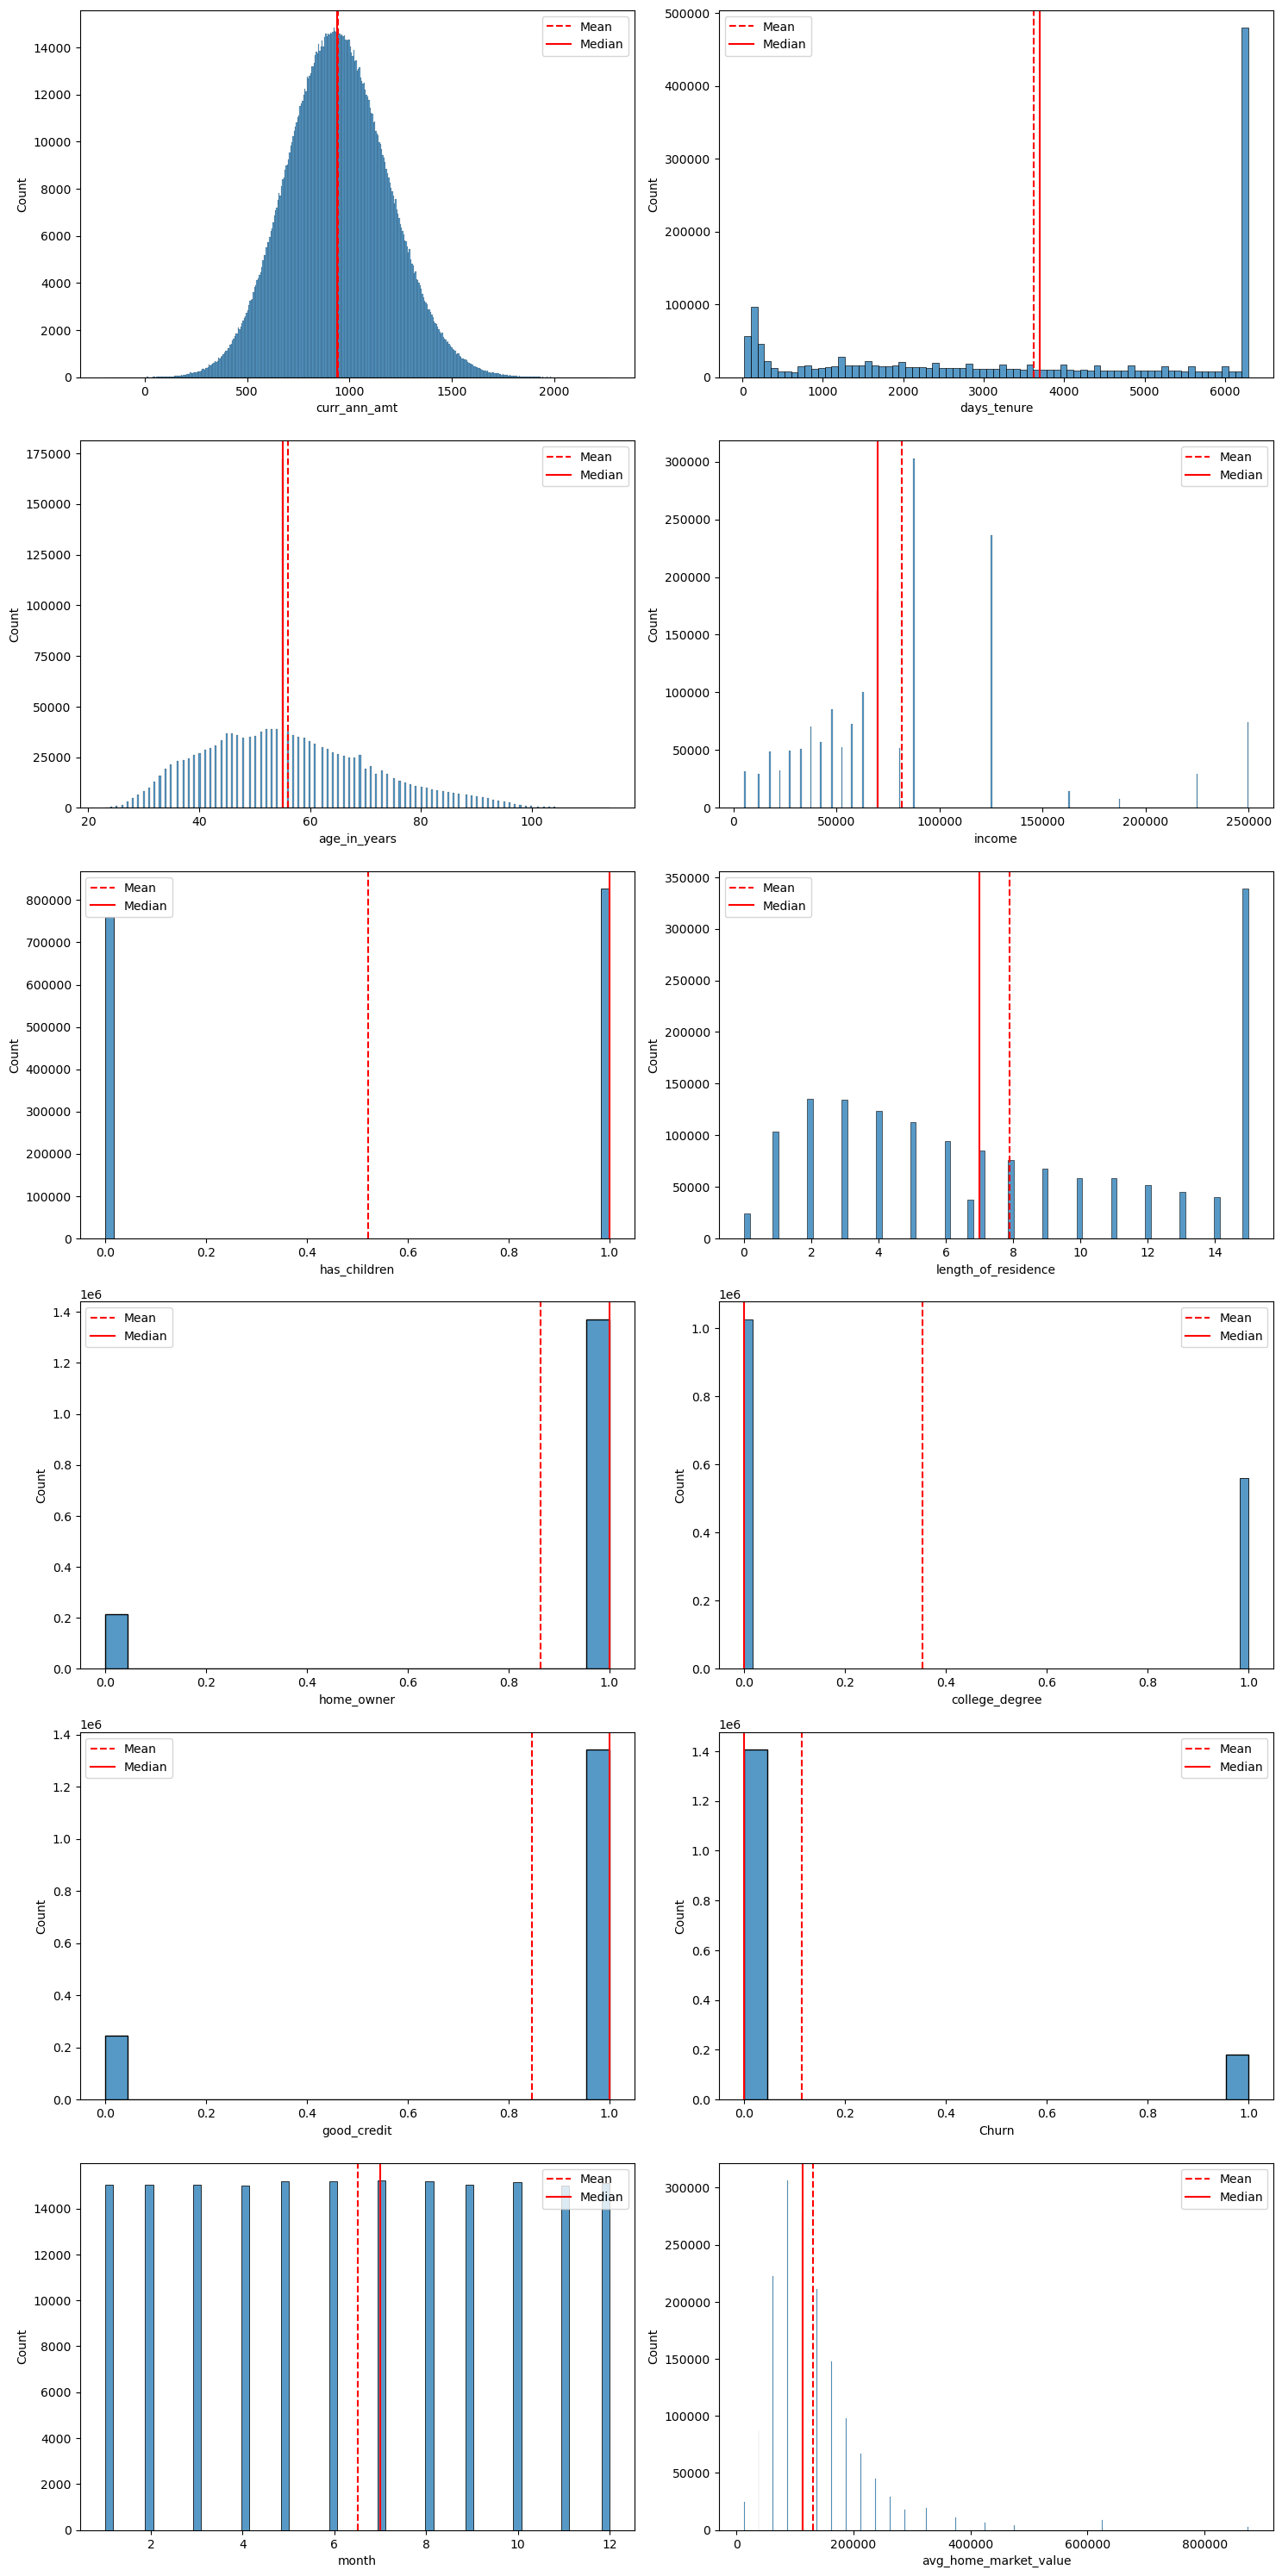

In [103]:
# Set up grid of subplots
plt.subplots(6, 2, figsize=(15, 30))

# Initialize counter
plot_num = 1

# Loop through column names in DataFrame
for col in df_auto_churn_clean.select_dtypes(exclude='object').columns:
    if not col.startswith('county_'):
        var = df_auto_churn_clean[col]
        var_mean = var.mean()
        var_median = var.median()

        plt.subplot(6, 2, plot_num)
        sns.histplot(var, kde=False)
        plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
        plt.axvline(var_median, c='r', label='Median')
        plt.legend()

        plot_num += 1

# Ensure that plots don't overlap
plt.tight_layout()

plt.show()

### B. Subplot Findings

Findings of all numerical dtype column subplots: 

    1. curr_ann_amt: The count for this column has a normal distribution between 0 and 2000. However, its mean and median rests around ~$950. 

    2. days_tenture: This column does not have a normal distribution. Its range starts at 1 day and ends somewhere near 6500 days.  Most of the distribution is flat. However, there are higher counts below the 500-day marker and a significant number around 6500 days. The significant number around 6500 days is due to the majority of customers still retaining their policy beyond the scope of time that this day was collected for. 

    3. age_in_years: The distribution for age is right-skewed, which is due to people opting to no longer drive as they get older. This distribution is also constrained by the typical human lifespan. The mean and median are around 55 years. 

    4. income: The distribution of this column does not appear to be normal. However, societal economic classes can be observed in this distribution, where the majority of bars in the plot are below $100,000, which is where the majority of the middle class rests. The mean and median are pulled right due to the outliers that make up the upper class or those that make over $100,000.

    5. has_children: This column has a binary distribution as you can either have children or not. Based on this plot, there are roughly an equal number of people do and do not have children. 

    6. length_of_residence: The distribution of this column is right-skewed with its lowest point starting at 1 month of residence. This trend moves up and caps out at 2 months. There is a slight drop at 3 months and then the downward trend continues until we see a significant drop-off at about ~6.6 months. The count rebounds at 7 months and continues a more gradual downward trend until 14 months. However, the last bar in the plot shows that the majority of customers have been at their residence for greater than 15 months. 

    7. home_owner: This column has a binary distribution where the majority of customers are homeowners and a small portion do not. 

    8. college_degree: This column has a binary distribution where the majority of customers do not have a college degree. However, a moderate number do have a college degree. 

    9. good_credit: This column has a binary distribution where the majority of customers have good credit and a small portion do not. 

    10. Churn: This column has a binary distribution where the majority of customers retained their auto insurance policy and a small portion did not. 

    11. month: The distribution for the month column appears to be even across each month. However, the mean line appears to be at month 6.5 and the median at 7 months. This behavior is odd and will be explored further during Feature Engineering/In-Depth EDA. 

    12. ave_home_market_value: The distribution of this plot is right-skewed. However, the details of this plot are sparse and will require further in-depth analysis.

Next we will move onto some feature engineering. 

## 6. Feature Engineering/In-Depth EDA
<a class="anchor" id="part-6"></a>

### A. Dummies

Lets explore the county and marital_status columns to best determine if getting dummies is indeed the best way to handle the column. We wil also see how getting dummies for these columns will change the dataframe. 

In [110]:
# Get the unique values in the 'county' column of df_raw
df_auto_churn_clean['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', 'Parker',
       'Ellis', 'Hunt', 'Johnson', 'Rockwall', nan, 'Cooke', 'Navarro',
       'Grayson', 'Hill'], dtype=object)

In [111]:
# Count the total number of unique values in the 'city' column
len(df_auto_churn_clean['county'].unique())

15

The county column still has null values, so we will drop those first before getting dummies.  

In [113]:
# Drop rows with missing values in the county' columns
df_auto_churn_clean.dropna(subset=['county'], inplace=True)

Lets sense check the drop. 

In [115]:
# Get the unique values in the 'county' column of df_raw
df_auto_churn_clean['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', 'Parker',
       'Ellis', 'Hunt', 'Johnson', 'Rockwall', 'Cooke', 'Navarro',
       'Grayson', 'Hill'], dtype=object)

County is ready for dummies, but we will do this simultaneously with the marital_status column.

In [117]:
# Get the unique values in the 'marital_status' column of df_raw
df_auto_churn_clean['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

The marital_status only has two unique values and no null values, so no additionally modifications need to be made to the columbe before getting dummies. 

In [119]:
# Get dummy variables for 'county' and 'marital_status' columns
df_auto_churn_clean = df_auto_churn_clean.join(pd.get_dummies(df_raw[['county', 'marital_status']]))

In [120]:
# Display information about the DataFrame
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float32
 1   days_tenure             1576377 non-null  float32
 2   age_in_years            1576377 non-null  int64  
 3   county                  1576377 non-null  object 
 4   income                  1576377 non-null  float32
 5   has_children            1576377 non-null  int32  
 6   length_of_residence     1576377 non-null  float32
 7   marital_status          1576377 non-null  object 
 8   home_owner              1576377 non-null  int32  
 9   college_degree          1576377 non-null  int32  
 10  good_credit             1576377 non-null  int32  
 11  Churn                   1576377 non-null  int32  
 12  month                   179898 non-null   float64
 13  avg_home_market_value   1576377 non-null  float64
 14  county_

### B. Dummies Columns and/or Row Drops

Now that we have our dummies we can go ahead and drop all the columns we created dummies for, which will be the 'county' and 'marital_status' columns. Then we will check the DataFrame's info to confirm the changes took.  

In [123]:
# Dropping 'county' and 'marital_status' columns from df_auto_churn_clean
df_auto_churn_clean = df_auto_churn_clean.drop(['county','marital_status'], axis=1)

In [124]:
# Display information about the df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float32
 1   days_tenure             1576377 non-null  float32
 2   age_in_years            1576377 non-null  int64  
 3   income                  1576377 non-null  float32
 4   has_children            1576377 non-null  int32  
 5   length_of_residence     1576377 non-null  float32
 6   home_owner              1576377 non-null  int32  
 7   college_degree          1576377 non-null  int32  
 8   good_credit             1576377 non-null  int32  
 9   Churn                   1576377 non-null  int32  
 10  month                   179898 non-null   float64
 11  avg_home_market_value   1576377 non-null  float64
 12  county_Collin           1576377 non-null  bool   
 13  county_Cooke            1576377 non-null  bool   
 14  county_

All the desired columns are present and none are object dtype. 

Lets check confirm that no null values remain with the exception of the month column. 

In [126]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt               0.000000
days_tenure                0.000000
age_in_years               0.000000
income                     0.000000
has_children               0.000000
length_of_residence        0.000000
home_owner                 0.000000
college_degree             0.000000
good_credit                0.000000
Churn                      0.000000
month                     88.587882
avg_home_market_value      0.000000
county_Collin              0.000000
county_Cooke               0.000000
county_Dallas              0.000000
county_Denton              0.000000
county_Ellis               0.000000
county_Grayson             0.000000
county_Hill                0.000000
county_Hunt                0.000000
county_Johnson             0.000000
county_Kaufman             0.000000
county_Navarro             0.000000
county_Parker              0.000000
county_Rockwall            0.000000
county_Tarrant             0.000000
marital_status_Married     0.000000
marital_status_Single      0

Despite the month column having ~89% null values, I will not drop the column until after I have investigated its potential significance in next section as the month column contained the datetime data of the Churn column.  

__________________________________________________________________________________________________________________________________________

Lets get a sense of the shape, head and info for  df_auto_churn_clean.

In [130]:
# Print the shape of the dataframe. 
df_auto_churn_clean.shape

(1576377, 28)

In [131]:
# Display the first 10 rows of the DataFrame df_auto_churn_clean
df_auto_churn_clean.head(10)

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,...,county_Hill,county_Hunt,county_Johnson,county_Kaufman,county_Navarro,county_Parker,county_Rockwall,county_Tarrant,marital_status_Married,marital_status_Single
0,818.877991,1454.0,44,22500.0,1,15.0,1,1,1,0,...,False,False,False,True,False,False,False,False,True,False
1,974.199158,1795.0,72,27500.0,0,2.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,967.375122,4818.0,55,42500.0,0,10.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,992.409546,130.0,53,125000.0,1,6.0,1,0,1,1,...,False,False,False,False,False,False,False,True,True,False
4,784.633484,5896.0,50,87500.0,1,4.0,1,1,1,0,...,False,False,False,False,False,False,False,True,True,False
5,909.916138,484.0,33,52500.0,0,2.0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
6,1084.048218,2896.0,71,125000.0,1,8.0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
7,1277.370728,4096.0,46,47500.0,0,12.0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
8,917.201050,2107.0,56,47500.0,0,6.0,1,1,1,1,...,False,False,False,False,False,False,False,True,False,True
9,1095.390747,3387.0,64,32500.0,0,15.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [132]:
# Display information about the DataFrame df_auto_churn_clean, including column names, data types, and memory usage
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float32
 1   days_tenure             1576377 non-null  float32
 2   age_in_years            1576377 non-null  int64  
 3   income                  1576377 non-null  float32
 4   has_children            1576377 non-null  int32  
 5   length_of_residence     1576377 non-null  float32
 6   home_owner              1576377 non-null  int32  
 7   college_degree          1576377 non-null  int32  
 8   good_credit             1576377 non-null  int32  
 9   Churn                   1576377 non-null  int32  
 10  month                   179898 non-null   float64
 11  avg_home_market_value   1576377 non-null  float64
 12  county_Collin           1576377 non-null  bool   
 13  county_Cooke            1576377 non-null  bool   
 14  county_

### C. Collinearity & MultiCollinearity

Since we generated dummies for the county and marital_status columns, we need to drop at least one of the columns for each set of columns generated by the get dummies function. This is a necessary step to avoid perfect multicollinearity. We will look at the count of each column to determine what columns will have the least statistical impact on the dataframe when dropped.

#### - county MultiCollinearity

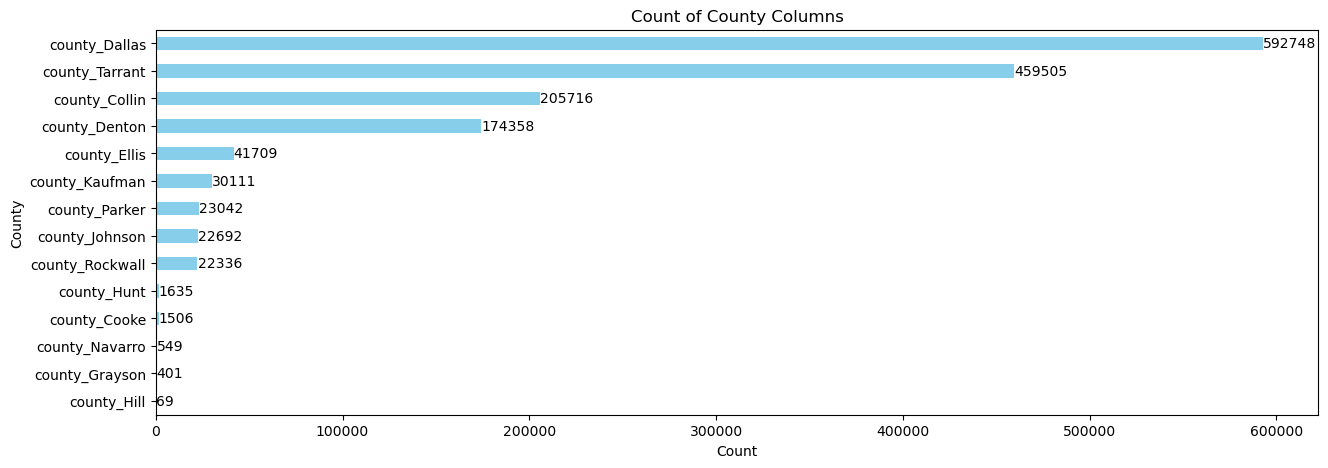

In [136]:
# Filter county and marital status columns from the DataFrame
county_columns = [col for col in df_auto_churn_clean.columns if col.startswith('county_')]

# Calculate the counts for each county column
county_counts = df_auto_churn_clean[county_columns].sum()

# Sort the county counts
county_counts = county_counts.sort_values()

# Plot bar chart for county columns
plt.figure(figsize=(15, 5))
county_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('County')
plt.title('Count of County Columns')

# Annotate bars in the county chart
for i, count in enumerate(county_counts):
    plt.text(count + 5, i, f'{count}', ha='left', va='center')

plt.show()

In [137]:
# Filter county columns from the DataFrame
county_columns = [col for col in df_auto_churn_clean.columns if col.startswith('county_')]

# Calculate count and percentage for each county column
county_counts_percentage = {}
total_rows = len(df_auto_churn_clean)
for county_col in county_columns:
    count = df_auto_churn_clean[county_col].sum()
    percentage = (count / total_rows) * 100
    county_counts_percentage[county_col] = percentage

# Create a DataFrame from the dictionary
county_counts_df = pd.DataFrame.from_dict(county_counts_percentage, orient='index', columns=['Percentage'])

# Display the DataFrame as a table
print(county_counts_df)

                 Percentage
county_Collin     13.049924
county_Cooke       0.095536
county_Dallas     37.601919
county_Denton     11.060679
county_Ellis       2.645877
county_Grayson     0.025438
county_Hill        0.004377
county_Hunt        0.103719
county_Johnson     1.439503
county_Kaufman     1.910140
county_Navarro     0.034827
county_Parker      1.461706
county_Rockwall    1.416920
county_Tarrant    29.149436


Since the 'county_Hill' column has the smallest count at 69, we will drop that column to avoid perfect multicollinearity.

In [139]:
# Dropping the 'county_Hill' column from df_auto_churn_clean DataFrame
df_auto_churn_clean.drop(columns=['county_Hill'], inplace=True)

Lets do a sense check to confirm the column was dropped. 

In [141]:
# Display information about the DataFrame df_auto_churn_clean, including column names, data types, and memory usage
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576377 entries, 0 to 1680908
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1576377 non-null  float32
 1   days_tenure             1576377 non-null  float32
 2   age_in_years            1576377 non-null  int64  
 3   income                  1576377 non-null  float32
 4   has_children            1576377 non-null  int32  
 5   length_of_residence     1576377 non-null  float32
 6   home_owner              1576377 non-null  int32  
 7   college_degree          1576377 non-null  int32  
 8   good_credit             1576377 non-null  int32  
 9   Churn                   1576377 non-null  int32  
 10  month                   179898 non-null   float64
 11  avg_home_market_value   1576377 non-null  float64
 12  county_Collin           1576377 non-null  bool   
 13  county_Cooke            1576377 non-null  bool   
 14  county_

The 'county_Hill' column was successfully dropped. Lets move onto Marital Status. 

#### - martial_status MultiCollinearity

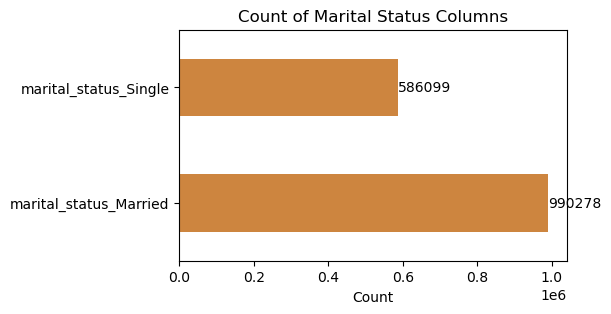

In [144]:
# Filter and plot county columns
plt.figure(figsize=(5, 3))
(df_auto_churn_clean.filter(like='marital_status').sum()
 .plot(kind='barh', color='peru', title='Count of Marital Status Columns'))
plt.xlabel('Count')

# Annotate bars
for i, count in enumerate(df_auto_churn_clean.filter(like='marital_status').sum()):
    plt.text(count + 5, i, f'{count}', ha='left', va='center')

plt.show()

Since there are only two columns for marital_status we will drop the column with the lowest count which is marital_status_Single.

In [146]:
# Dropping the 'marital_status_Single' column from df_auto_churn_clean DataFrame
df_auto_churn_clean.drop(columns=['marital_status_Single'], inplace=True)

Now that we have resolved the issues of multicollinearity with the new columns generated by getting dummies lets see if there is any additional multicollinearity or collinearity across the entire DataFrame by creating a heatmap. 

#### - DataFrame MultiCollinearity

#### Heatmap 1

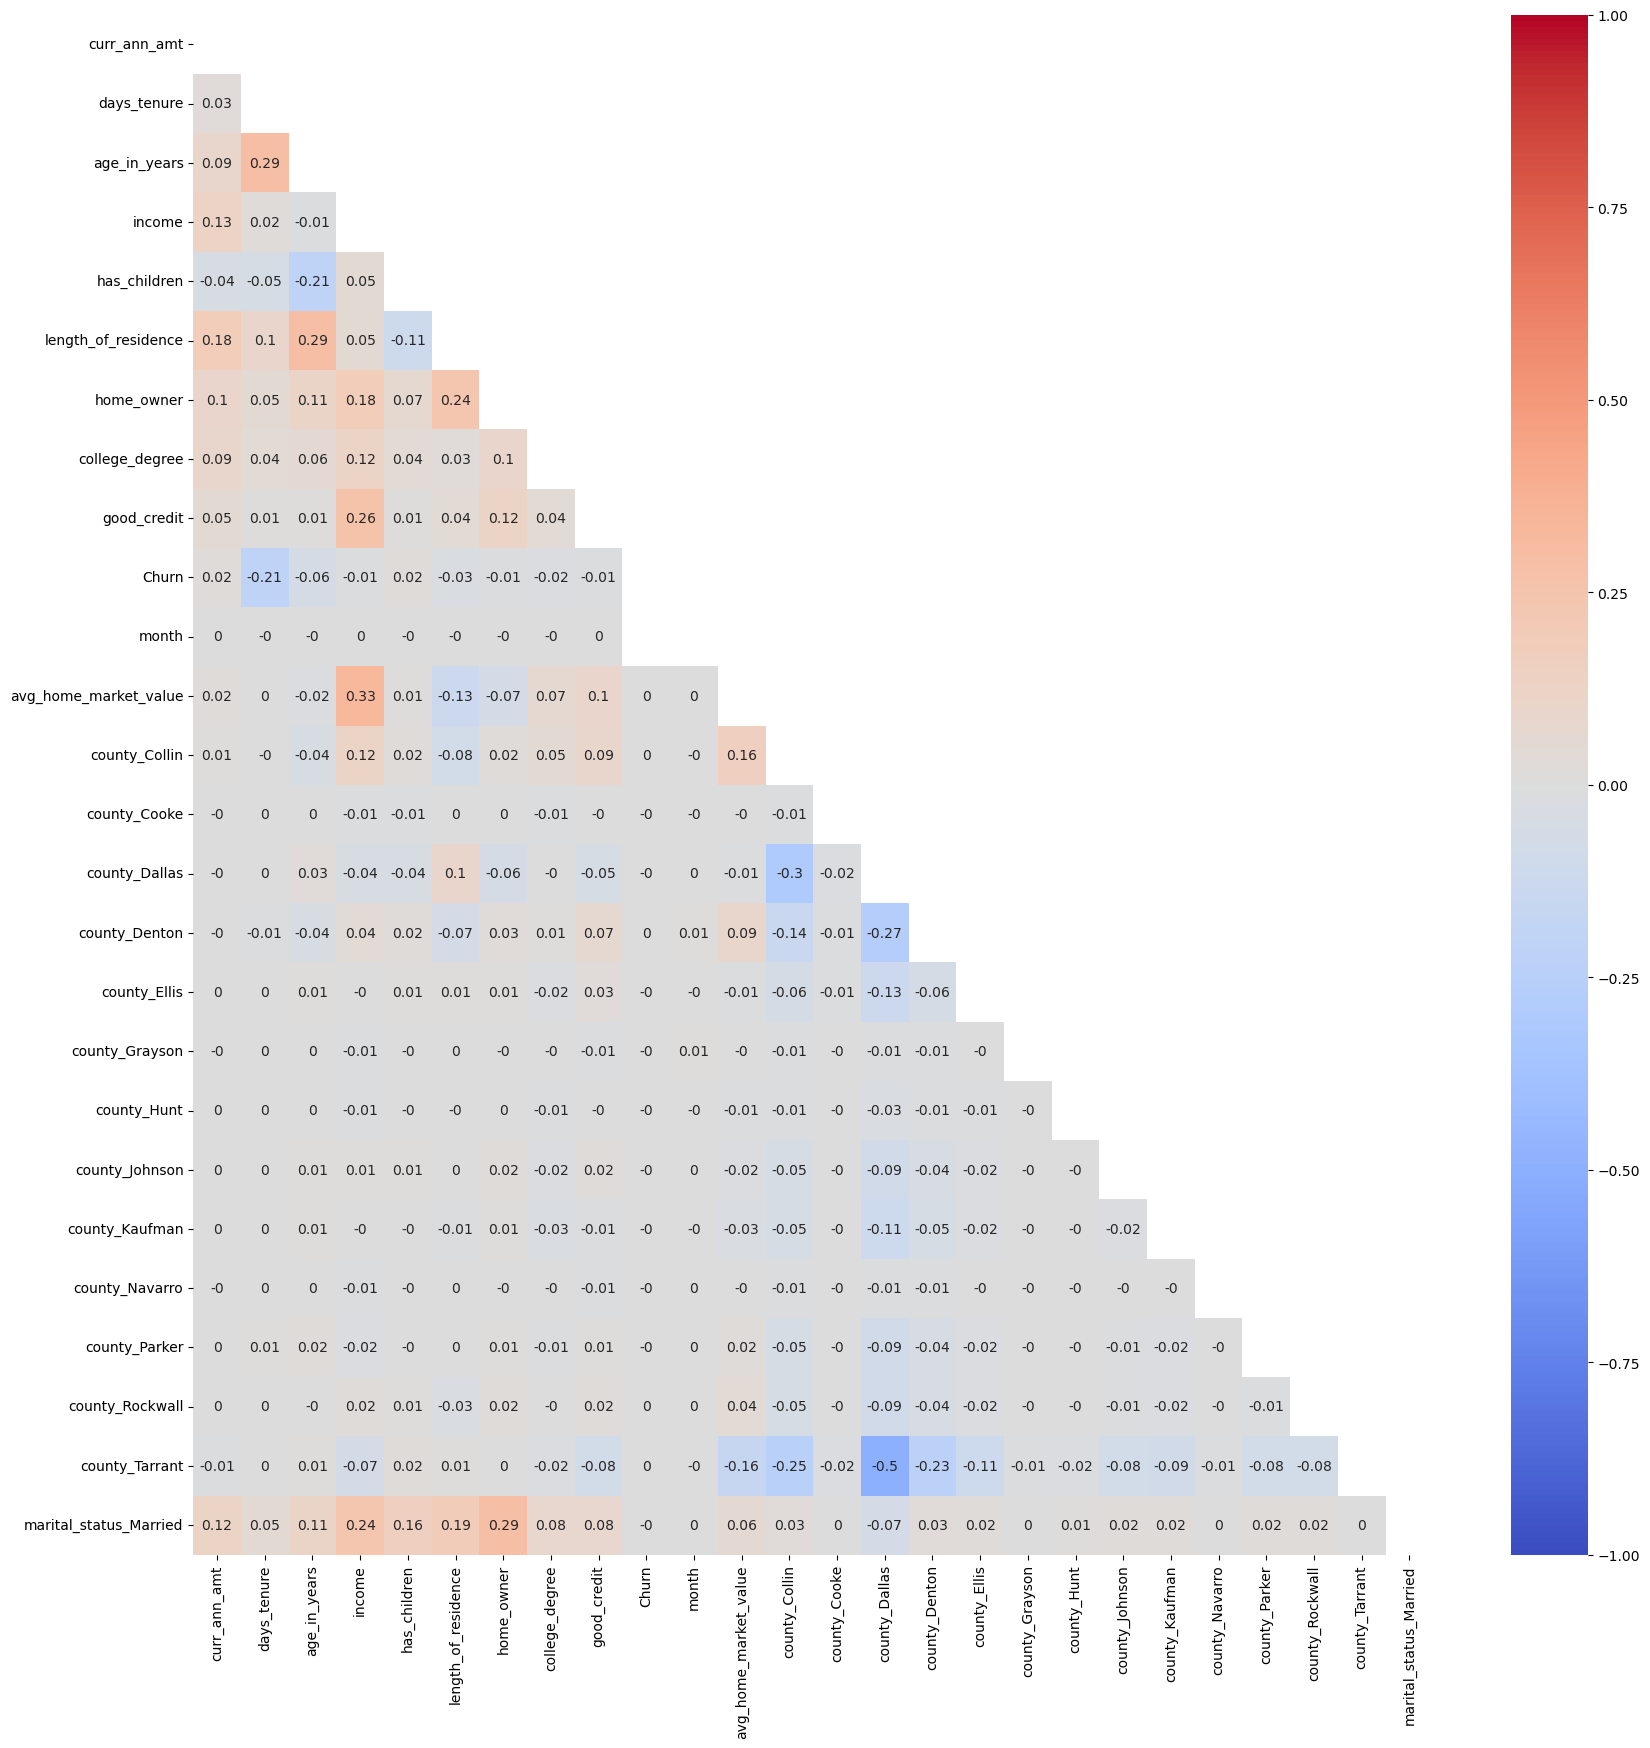

In [150]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

Next we will drop the county_Tarrant column due to it having high multicollinearity with the county_Dallas column, but having a lower count than the county_Dallas column.

The rest of the cells in the heatmap make sense. It is expected to see a large amount of 0 & -1. In the case of the county columns, it is because the county_Tarrant and county_Dallas columns make up ~66% of the total county count values. The presence of these two columns flattens the statistical significance of the rest of the county columns. 

In [152]:
# Dropping the 'county_Tarrant' column from df_auto_churn_clean DataFrame
df_auto_churn_clean.drop(columns=['county_Tarrant'], inplace=True)

With the county_Tarrant column dropped, we will plot another heatmap to check any additional high collinearity. 

#### Heatmap 2

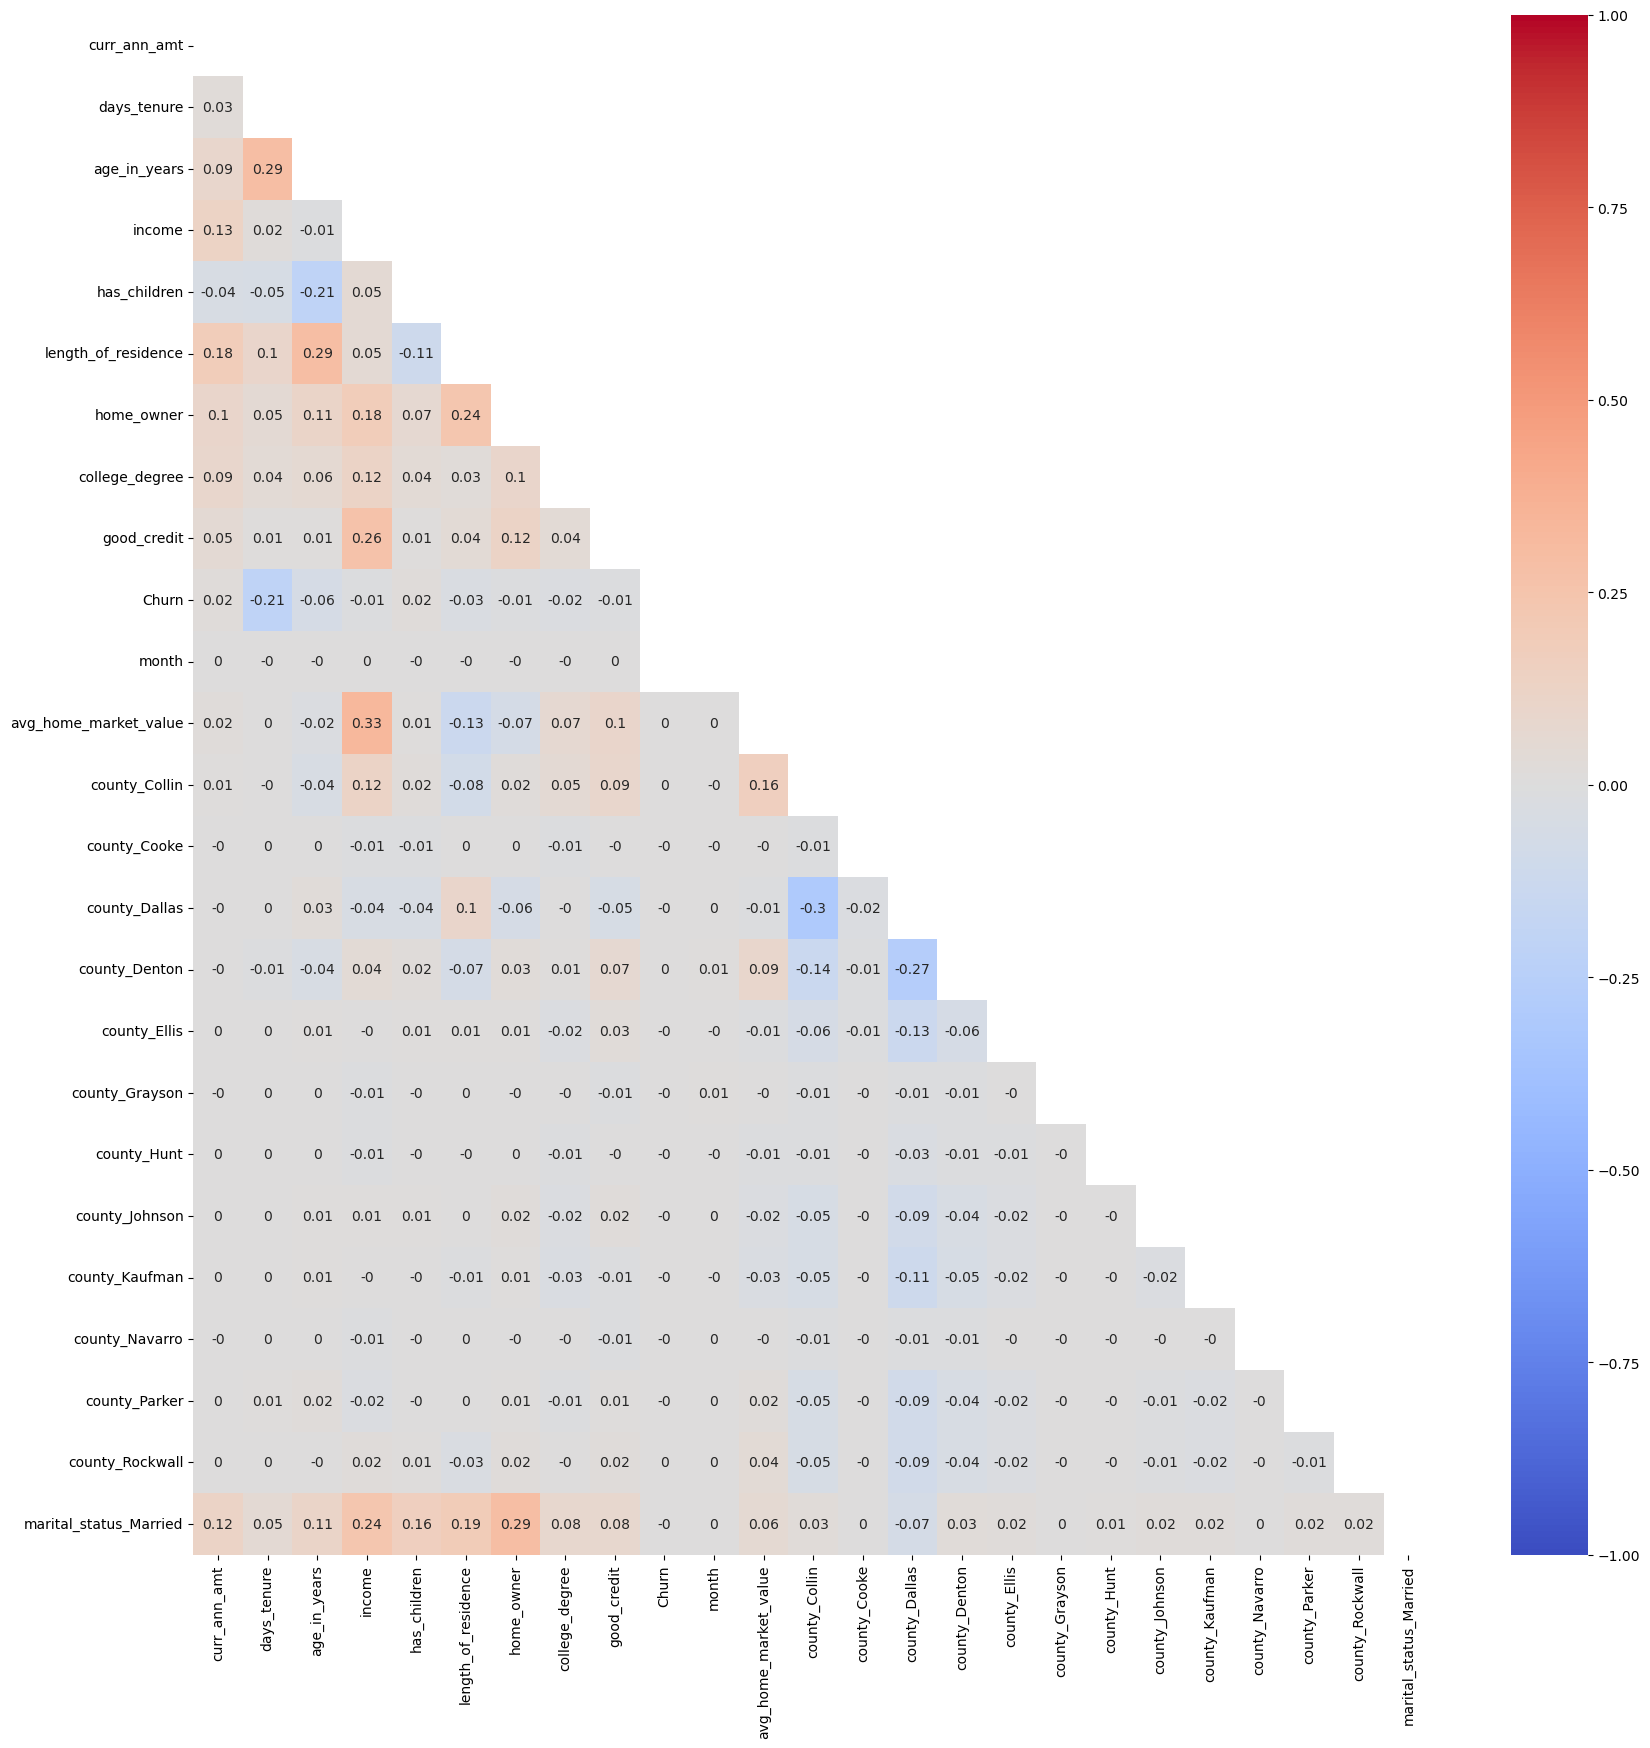

In [155]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

### D. In-Depth EDA

There does not appear to be any additional multicollinearity. 

What is most interesting is that most of the column do not have a significant correlation with the Churn column except for the days_tenure column. With a correlation of -0.21, I may need to explore days_tenure as a better measure of customer retention than Churn. 

Next we will plot the count distribution for each column excluding any columns that start with county. Based on the EDA above I will need do some feature engieering and experiment with consolidating all counties with a count of less than 100,000.

When looking at count distrbutions for each column I like to take a 'shot gun,' approached and look at as many sub plots as possible from a high level to better plan and organize my feature engineering. 

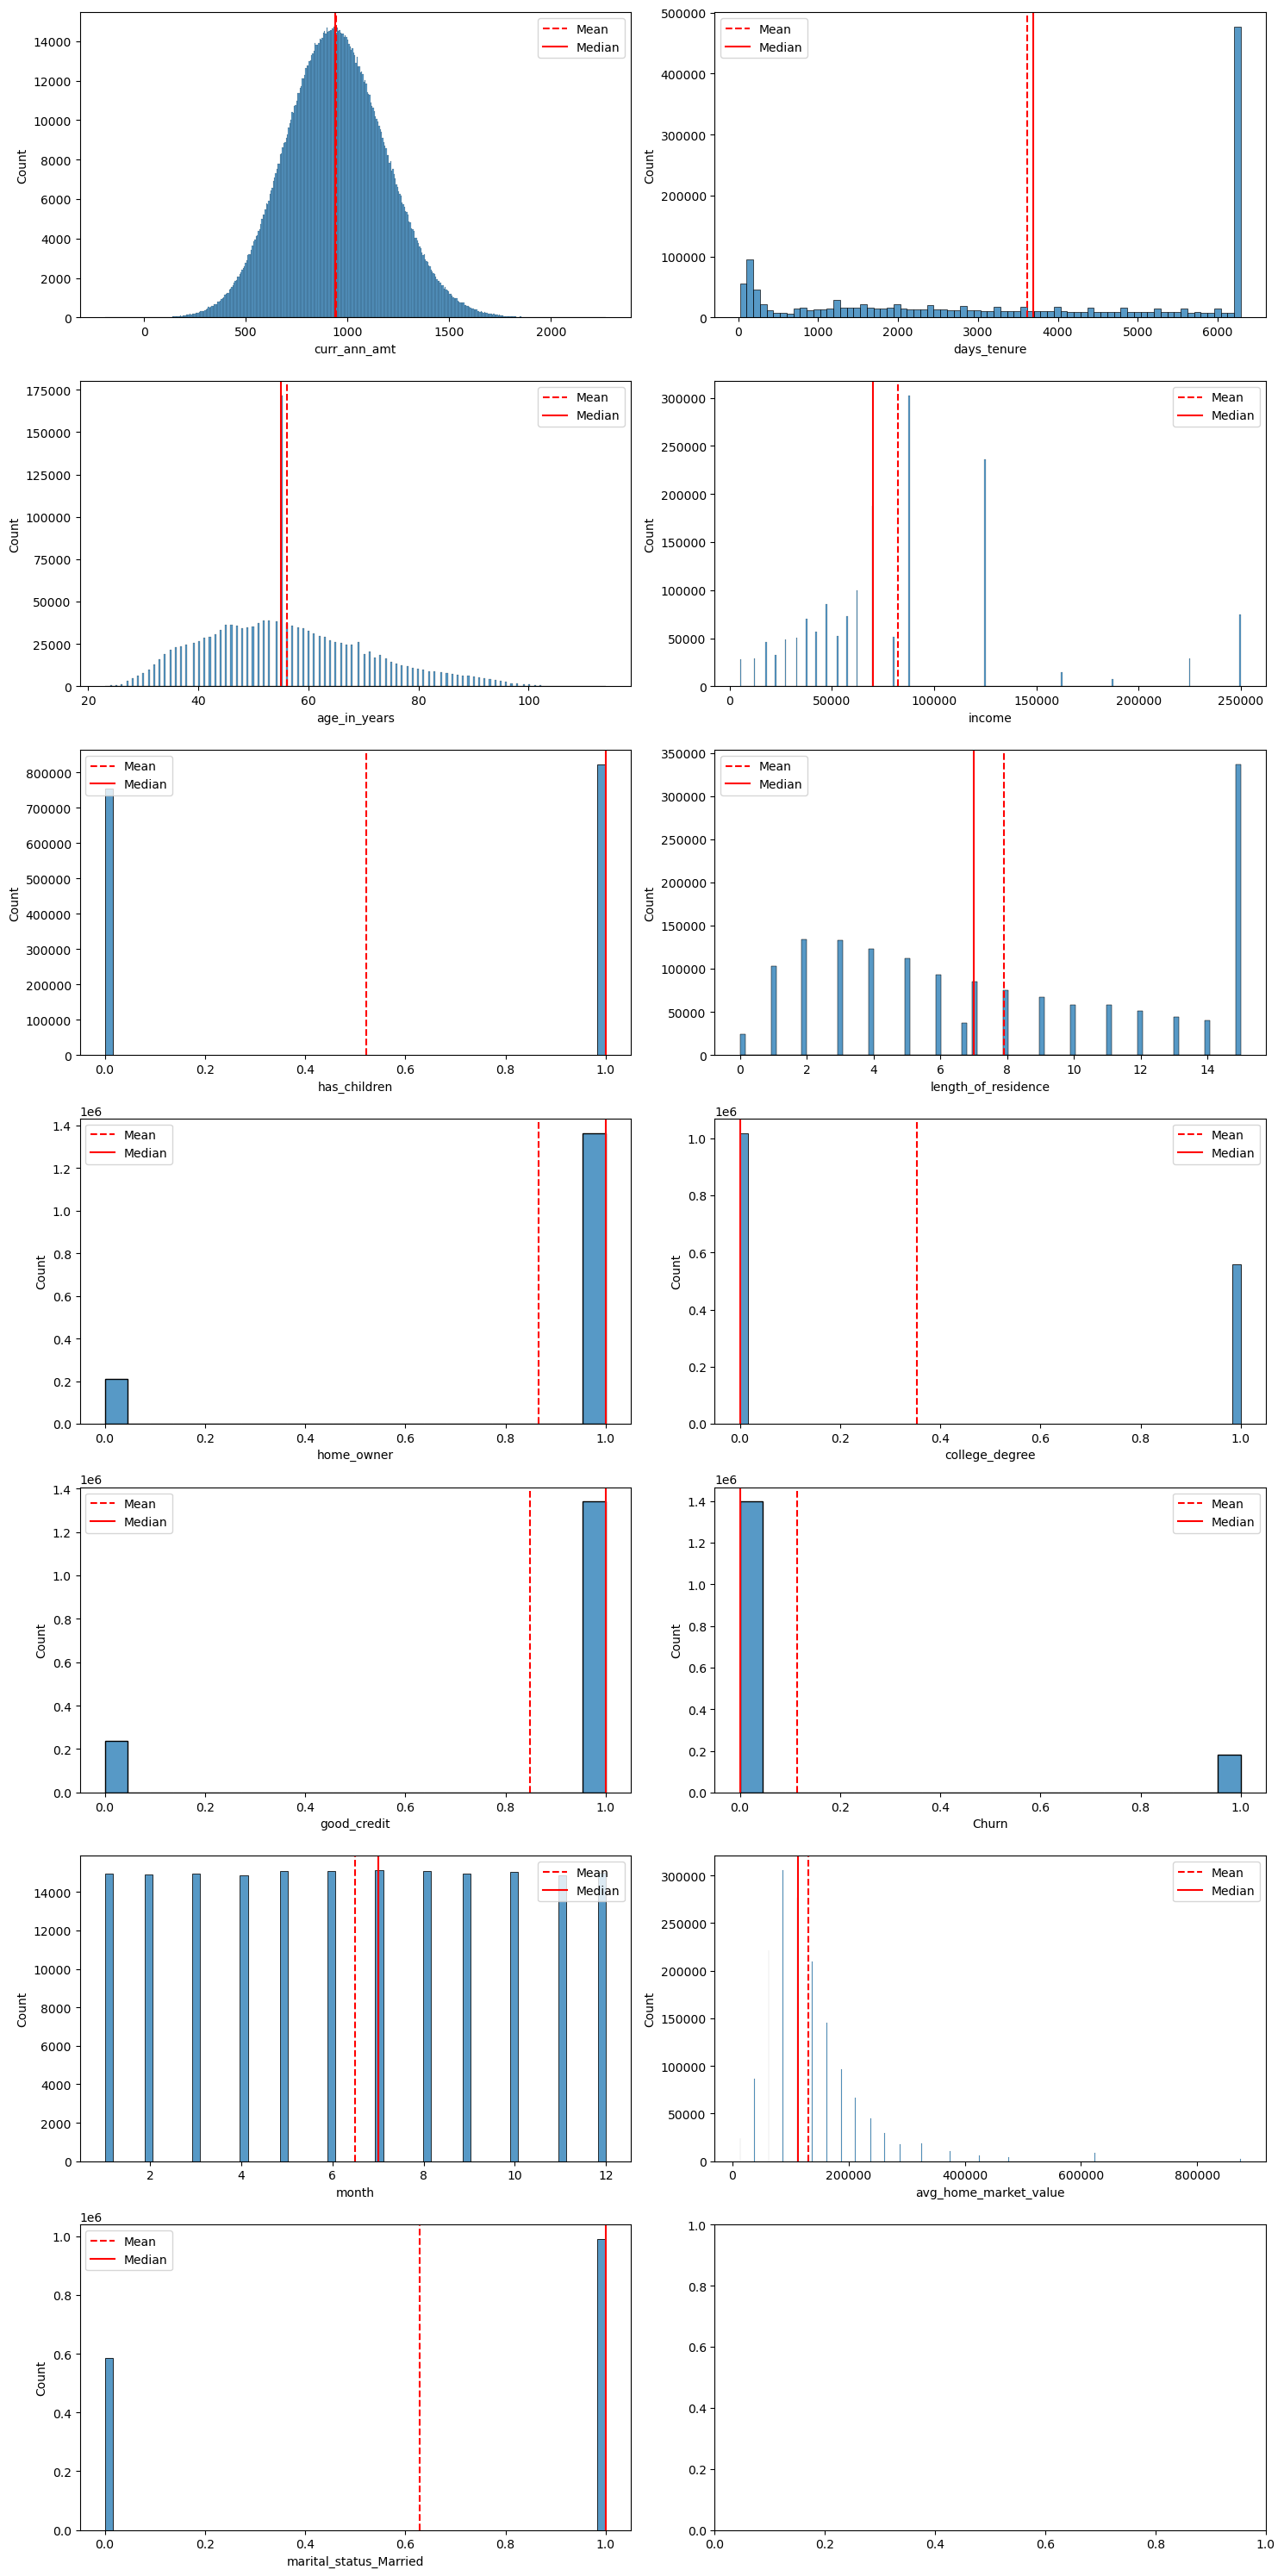

In [158]:
# Set up grid of subplots
plt.subplots(7, 2, figsize=(15, 30))

# Initialize counter
plot_num = 1

# Loop through column names in DataFrame
for col in df_auto_churn_clean.columns:
    if not col.startswith('county_'):
        var = df_auto_churn_clean[col]
        var_mean = var.mean()
        var_median = var.median()

        plt.subplot(7, 2, plot_num)
        sns.histplot(var)
        plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
        plt.axvline(var_median, c='r', label='Median')
        plt.legend()

        plot_num += 1

# Ensure that plots don't overlap
plt.tight_layout()

plt.show()

The findings and areas of interest below are based on the subplots and heatmaps above. 

Findings/Areas of Interest:

    1. curr_ann_amt - The only column with a very clear normal distribution. 
    
    2. days_tenure - Has ne interesting distirbution with the majoriy of days tenure being relatively flat for values between 500 and 600. Seperating this column into three groups(>500; 500-6000; <6000) will be a features to explore. 
    
    3. age_in_year - This column has a somewhat normal distrbution that is skewed right due to the natural life expectancy of humans. 
    
    4. income - Does not appear to have a normal distribution at a high level, but is still a key component of a customers ability to afford their auto insurance premium. 
    
    5. length_of_residence - Has a correlation of 0.29 with age_in_years, which is the same correlation that age_in_years has with days_tenure. (This observation has the the possible branches of a decision tree)
    
    6. avg_home_market_value - Has a strong correlation of 0.33 with income. The strong correlation is expected. 
    
    7. All boolean dtype columns some type of weak correlation with days_tenure.   

I was also able to determine that I will be dropping the month column does not bare any statisitical significance. Although it is perculiar to see the mean be month 7 and median month 6.5, there isn't much statisical value in this column since it is comprised of mostly 1 years worth of data. Thus, the month column will be dropped. There is some thought to also dropping the Churn column as only ~11% of its values are True. However, I may do some exploration of a subset of the overall dataframe based on just looking at all for that ~11% churned. I may go step further and compare it to an analysis of the whole data frame. For now, I will explore the relationship between Churn and predictive(continous dtype) columns. 

In [160]:
# Drop the 'month' column from the DataFrame df_auto_churn_clean in place
df_auto_churn_clean.drop(columns=['month'], inplace=True)

In [161]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
y = df_auto_churn_clean['Churn']
# visualise target vs float variable
x_options

['curr_ann_amt',
 'days_tenure',
 'income',
 'length_of_residence',
 'avg_home_market_value']

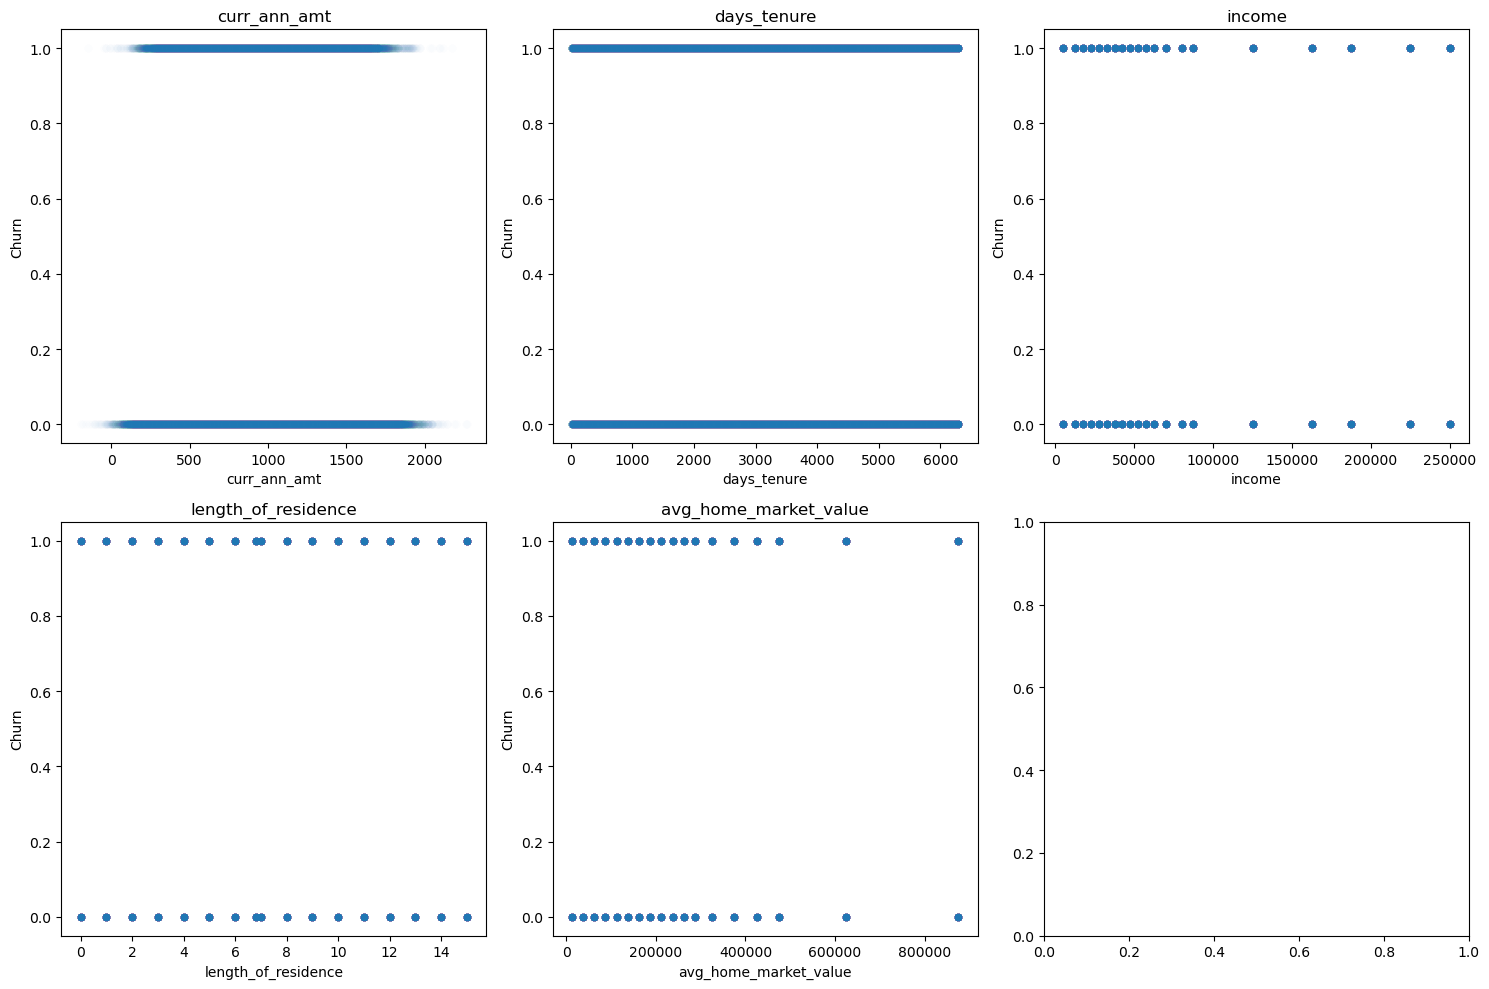

In [162]:
# visualise target vs float variable

plt.subplots(2,3,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,3,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'{col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

The relationships and distributions betwen Churn and predictive columns appears to be unclear in the sublots. This requires further investigation in future EDA. 

As mentioned prior, the days_tenure appears to be a better measure of customer retention, so lets explore the relationship between days_tenure and predictive columns. 

In [164]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
x_options.remove('days_tenure')  # Exclude 'days_tenure' from x_options as it is our target variable. 
y = df_auto_churn_clean['days_tenure']
x_options

['curr_ann_amt', 'income', 'length_of_residence', 'avg_home_market_value']

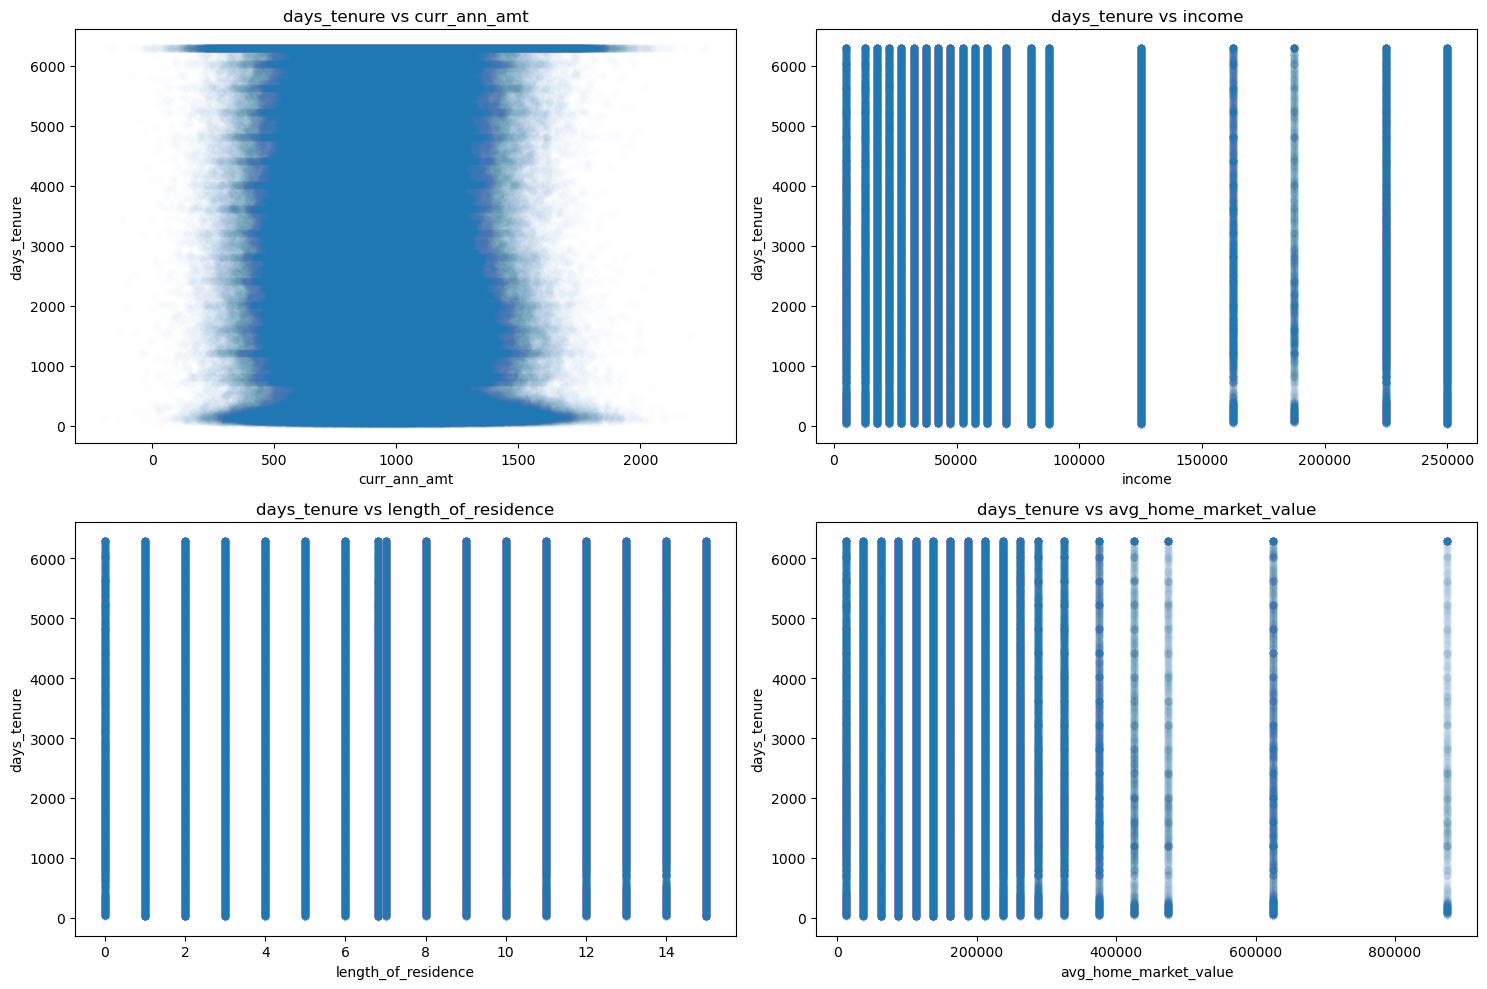

In [165]:
# visualise target vs float variable

plt.subplots(2,2,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,2,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'days_tenure vs {col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

Findings: 

Note: Due to hardware limitations I had challenges attempting to plot boxplots with this data set. I will may attempt boxplots with smaller subsets of data or with columns that my computer can handle. For now I will work with scatter plots even though it is hard to decern relationships and patterns with them. 

    1. days_tenure x cur_ann_ammt - It is difficult to decern what is happening in the plot. However, the broadest range of cur_ann_ammt can be observed at the early onset of days_tenure and longest days of days_tenure. It almost looks like a vertical double side version of the days_tenure histogram. 
    2. days_tenure x income - Show similar trends as days_tenure x cur_ann_ammt where the majority of plot points are skewed right. 
    3. days_tenure x length_of_residence - Revealed an issue with the quality of the data in the length_of_residence column. 
    4. days_tenure x avg_home_market_value - Appears to be a

 

#### - length_of_residence EDA

In [168]:
# Print the shape of the 'length_of_residence' column
df_auto_churn_clean['length_of_residence'].shape

(1576377,)

In [169]:
# Get the unique values in the 'length_of_residence' column of the DataFrame df_auto_churn_clean
df_auto_churn_clean['length_of_residence'].unique()

array([15.   ,  2.   , 10.   ,  6.   ,  4.   ,  8.   , 12.   ,  5.   ,
       11.   ,  9.   ,  7.   ,  1.   ,  3.   , 13.   ,  6.801,  0.   ,
       14.   ], dtype=float32)

During feature engineering, I will explore the 6.801 month values to determine what to do with them.  

We wills start by plotting the distribution of all the values in the 'length_of_residence' column and then get their exact counts. 

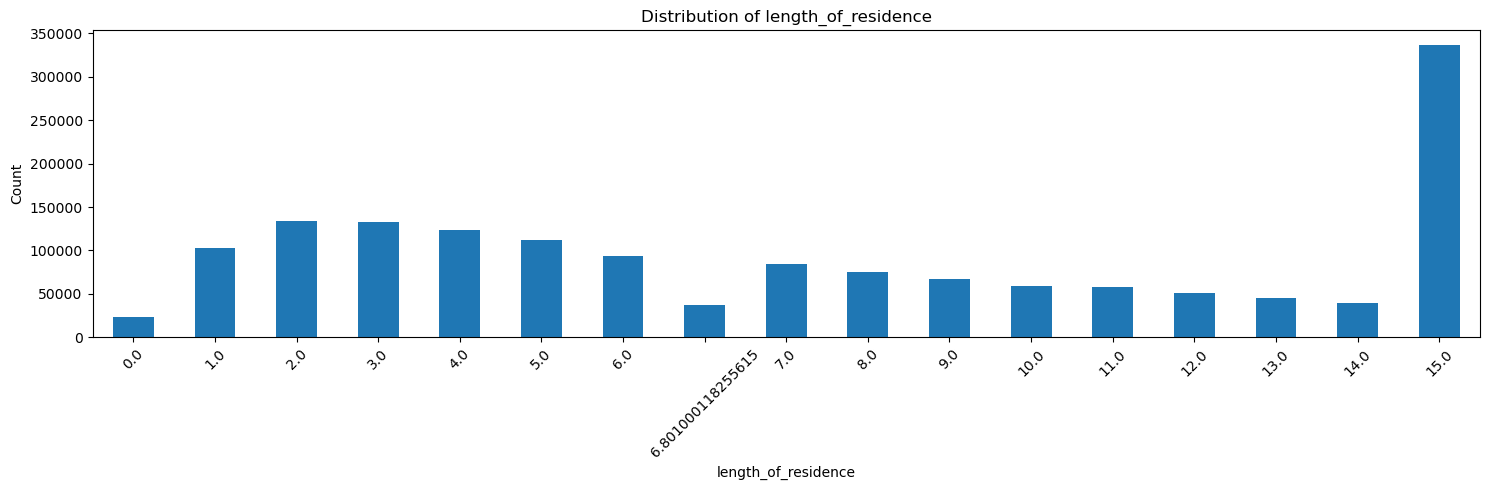

In [171]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'income' variable as a bar plot with count
ax = df_auto_churn_clean['length_of_residence'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('length_of_residence')
plt.ylabel('Count')
plt.title('Distribution of length_of_residence')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [172]:
# Filter rows where 'length_of_residence' is equal to 6.801000118255615
filtered_rows = df_auto_churn_clean[df_auto_churn_clean['length_of_residence'] == 6.801000118255615]

# Get the count of filtered rows
count_filtered_rows = filtered_rows.shape[0]

# Print the count
print(count_filtered_rows)

37351


6.801 month values are strange and make no real world sense, so all rows that contain these values will be dropped. 

In [174]:
# Value to check for
values_to_drop = [6.801000118255615]

# Filter out rows where 'length_of_residence' is in the specified values
df_auto_churn_clean = df_auto_churn_clean[~df_auto_churn_clean['length_of_residence'].isin(values_to_drop)]

Let's check the shape and unqiue values to confirm the rows containing 6.801000118255615 have been dropped. 

In [176]:
# Print the shape of the 'length_of_residence' column
df_auto_churn_clean['length_of_residence'].shape

(1539026,)

In [177]:
# Get the unique values in the 'length_of_residence' column of the DataFrame df_auto_churn_clean
df_auto_churn_clean['length_of_residence'].unique()

array([15.,  2., 10.,  6.,  4.,  8., 12.,  5., 11.,  9.,  7.,  1.,  3.,
       13.,  0., 14.], dtype=float32)

Now that those rows have been dropped, we can move onto EDA for the 'income' column.

####  - income EDA

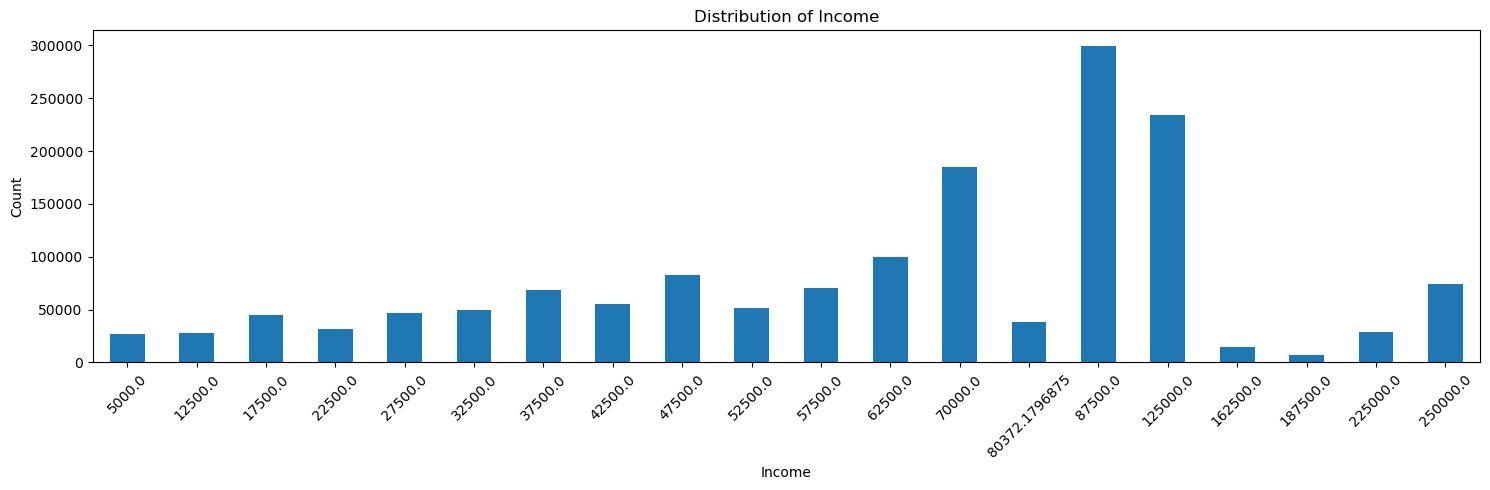

In [180]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'income' variable as a bar plot with count
ax = df_auto_churn_clean['income'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [181]:
# Calculate the mean of 'income' column. 
df_auto_churn_clean["income"].mean()

82532.586

In [182]:
# Calculate the median of 'income' column. 
df_auto_churn_clean["income"].median()

70000.0

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Large portion of customers in this data set make between $70,000 - $87,500. This makes some sense consider most people tend to achieve their heighest income later in life, which is supported by the presence of the large amoutn of 55 year old customers in the data set. The mean and median calculations above support this.
    
    2. For individuals that make $5,000. It is possible they have their cost of living supplemented somehow as $5,000 is not enough to live on, in addition to paying for auto insurance.  

#### - avg_home_market_value EDA

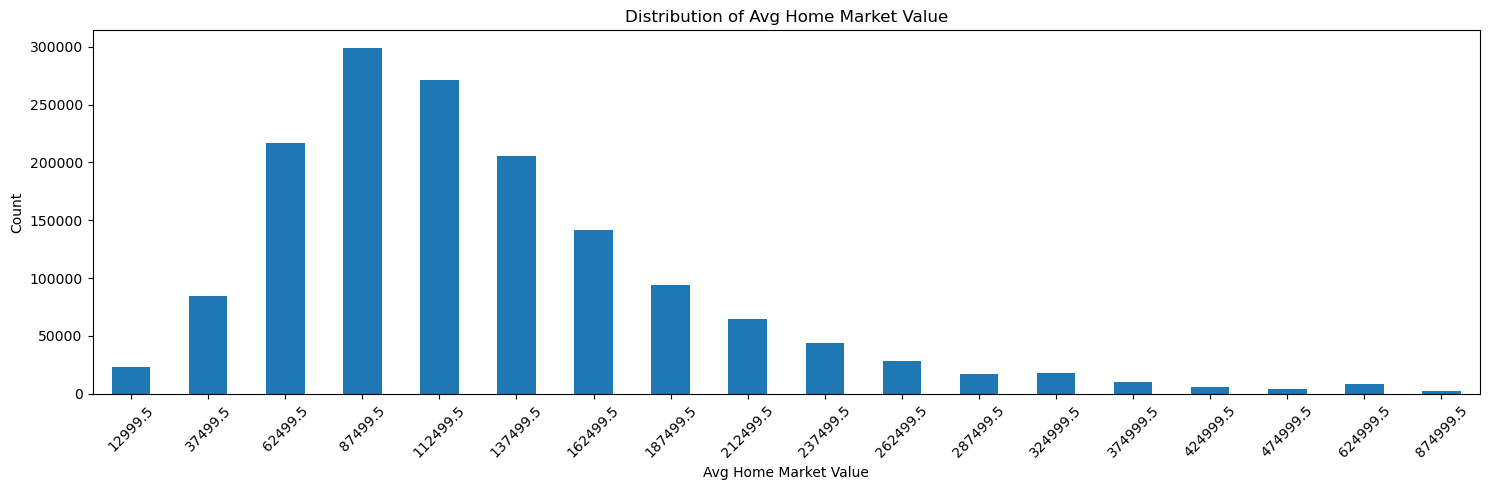

In [185]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'avg_home_market_value' variable as a bar plot with count
ax = df_auto_churn_clean['avg_home_market_value'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Avg Home Market Value')
plt.ylabel('Count')
plt.title('Distribution of Avg Home Market Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [186]:
# Calculate the mean of 'income' column. 
df_auto_churn_clean["avg_home_market_value"].mean()

130586.79644593399

In [187]:
# Calculate the median of 'income' column. 
df_auto_churn_clean["avg_home_market_value"].median()

112499.5

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Keeping the lower end of income in mind, those low income customer may only be able to rent. However, this dataset only has data for home owners and not renters, which may impact the modeling predictabiliy for customers that own homes versus those that do not.
    2. Distribution appears right skewed with a mean of ~$130,918 (~1.59 time more than the mean income = customers are living within their means) and median of ~$112,499((~1.58 time more than the mean income = customers are living within their means). 
    

For now lets explore the distribution of some of the columns of interest starting with age_in_years.

### E. Feature Engineering

#### - Feature Engineering age_in_years

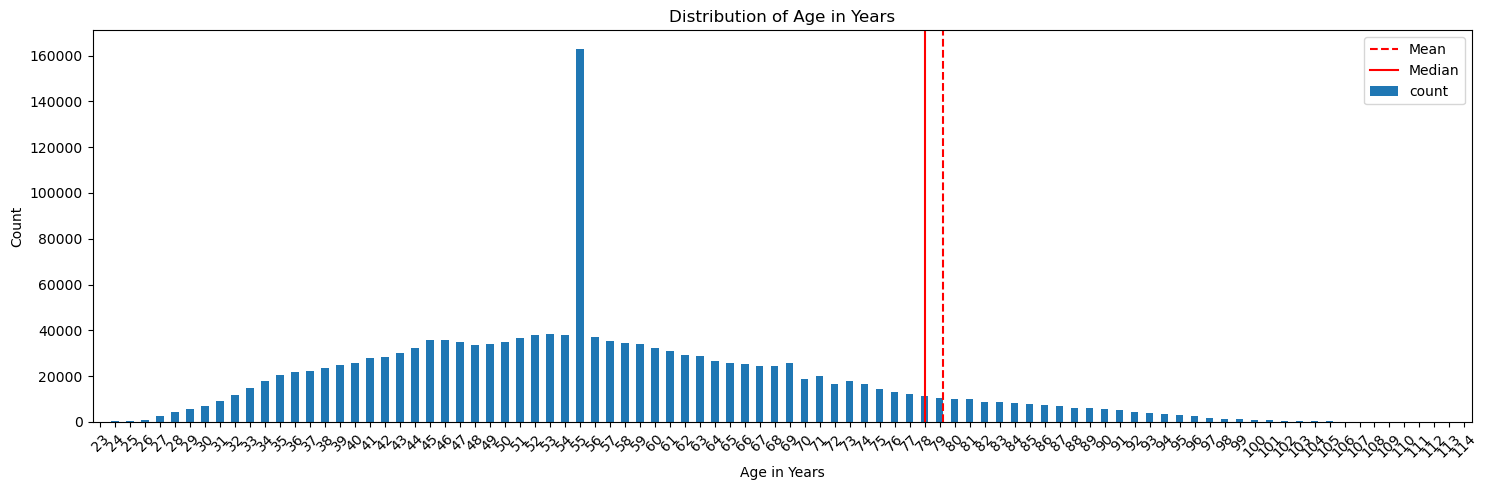

In [192]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'age_in_years' variable as a bar plot with count
ax = df_auto_churn_clean['age_in_years'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.title('Distribution of Age in Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot vertical lines for mean and median
var_mean = df_auto_churn_clean['age_in_years'].mean()
var_median = df_auto_churn_clean['age_in_years'].median()
plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
plt.axvline(var_median, c='r', label='Median')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Findings: 

    1. Surprisingly, many customers that still retained their auto insurance even passed the age of 100. Some carriers impliment restrictions based on age or underwrite very high premiums of these these individuals as they are high risk for car accidents/claims. 
    2. A large amount of customers are age 55. (This will likely compromise the accuracy of my data.)
    3. There are a smaller amount of drivers under 35 than expected. This makes this data unreliable for predicting rention of younger customers. 
    4. The presence of individuals over the age of 90 appears to be pulling both the mean and median right. 

The ages we have above are numerous and may not yield meaningful results when running models and may be computationally expensive in their current state, so we will group the ages into age groups. Below is a break-down of how we will go about this process of grouping. 

Next steps: 

    1. Get dummies for all ages so that we can start to group them.
    2. Additionally, even though there is no maximum age limit in the US for holding a driver's license, from a business standpoint, it does not make sense to retain detail for drivers over age 99, as it is rare for people to live past the age of 100 and even more rare that they are still driving. Therefore, we will drop all columns created for ages over 99. This step will also address any potential issues with perfect multicollinearity. 
    3. Next we will create new columns based by combining ages into age ranges. 
    4. Finally, we will review the distribution of the age range columns. 

Here we are getting dummies for the 'age_in_yrs' column and adding the prefix 'age_in_years' to each new column that is generated by this process. 

In [196]:
# Get dummy variables for 'age_in_years' column
df_auto_churn_clean = df_auto_churn_clean.join(pd.get_dummies(df_auto_churn_clean['age_in_years'], prefix='age_in_yrs'))

Below we will do a sense check to confirm the new columns were generated correctly. 

In [198]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,...,age_in_yrs_105,age_in_yrs_106,age_in_yrs_107,age_in_yrs_108,age_in_yrs_109,age_in_yrs_110,age_in_yrs_111,age_in_yrs_112,age_in_yrs_113,age_in_yrs_114
0,818.877991,1454.0,44,22500.0,1,15.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,974.199158,1795.0,72,27500.0,0,2.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,967.375122,4818.0,55,42500.0,0,10.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,992.409546,130.0,53,125000.0,1,6.0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,784.633484,5896.0,50,87500.0,1,4.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False


The new columns appear to be generated correctly. 

Even though there is no maximum age limit in the US for holding a driver's license, from a business standpoint it does not make sense to retain detail for drivers over 99yrs as it is rare for people to live past the age 100 and even more rare that they are still driving. Therefore, we will drop all the 'age_in_yrs' columns for ages 100 and above. 

We will iterate over the DataFrame to identify the 'age_in_yrs' columns for ages 100 and above and then drop them. 

In [202]:
# Identify age_in_yrs_columns 
age_columns = [col for col in df_auto_churn_clean.columns 
                   if isinstance(col, str) and col.startswith('age_in_yrs_') 
                   and int(col.split('_')[-1]) in range(100, 115)]

# Drop the identified columns
df_auto_churn_clean = df_auto_churn_clean.drop(columns=age_columns)

Now let's check the head of the DataFrame to confirm the correct columns were dropped. 

In [204]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,...,age_in_yrs_90,age_in_yrs_91,age_in_yrs_92,age_in_yrs_93,age_in_yrs_94,age_in_yrs_95,age_in_yrs_96,age_in_yrs_97,age_in_yrs_98,age_in_yrs_99
0,818.877991,1454.0,44,22500.0,1,15.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,974.199158,1795.0,72,27500.0,0,2.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,967.375122,4818.0,55,42500.0,0,10.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,992.409546,130.0,53,125000.0,1,6.0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,784.633484,5896.0,50,87500.0,1,4.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False


The correct columns were dropped. 

Next we will consolidate the ages into age ranges. This should make the DataFrame more computationally manageable.  

In [207]:
import re

# Define the age ranges and their corresponding column names
age_ranges = {
    '23_29': range(23, 30),
    '30_39': range(30, 40),
    '40_49': range(40, 50),
    '50_59': range(50, 60),
    '60_69': range(60, 70),
    '70_79': range(70, 80),
    '80_89': range(80, 90),
    '90_99': range(90, 100)
}

# Initialize a dictionary to store aggregated columns
age_columns_combined = {}

# Regular expression pattern to extract age from column names
age_pattern = re.compile(r'age_in_yrs_(\d+)')

# Combine columns based on age ranges
for range_key, age_range in age_ranges.items():
    # Identify columns for the current age range
    relevant_columns = [col for col in df_auto_churn_clean.columns
                        if isinstance(col, str) and col.startswith('age_in_yrs_')
                        and age_pattern.search(col)]
    
    # Filter columns that match the current age range
    relevant_columns = [col for col in relevant_columns
                        if int(age_pattern.search(col).group(1)) in age_range]

    # Combine columns by summing or another aggregation method
    if relevant_columns:
        # Create a new column with the prefix 'age_in_years_' and the range label
        new_column_name = f'age_range_{range_key}'
        df_auto_churn_clean[new_column_name] = df_auto_churn_clean[relevant_columns].sum(axis=1)
        age_columns_combined[new_column_name] = relevant_columns

# Drop the original columns
columns_to_drop = [col for cols in age_columns_combined.values() for col in cols]
df_auto_churn_clean.drop(columns=columns_to_drop, inplace=True)

OpenAI. 2024. ChatGPT (GPT-4.0). [Generative AI]. [Accessed 21 July 2024]. Available from: https://chatgpt.com/share/7df5dd00-59bc-47b0-bee3-07766eaff326

Used to help resolve issue with the logic and naming convention of creating the age range columns. 

Now let's check the head to confirm the range columns were created.

In [210]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,...,county_Rockwall,marital_status_Married,age_range_23_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60_69,age_range_70_79,age_range_80_89,age_range_90_99
0,818.877991,1454.0,44,22500.0,1,15.0,1,1,1,0,...,False,True,0,0,1,0,0,0,0,0
1,974.199158,1795.0,72,27500.0,0,2.0,1,0,0,0,...,False,False,0,0,0,0,0,1,0,0
2,967.375122,4818.0,55,42500.0,0,10.0,1,0,0,0,...,False,True,0,0,0,1,0,0,0,0
3,992.409546,130.0,53,125000.0,1,6.0,1,0,1,1,...,False,True,0,0,0,1,0,0,0,0
4,784.633484,5896.0,50,87500.0,1,4.0,1,1,1,0,...,False,True,0,0,0,1,0,0,0,0


The DataFrame shows the desired changes. 

No let's drop the 'age_in_yrs_' columns since we have our desired 'range' columns in the DataFrame. 

In [213]:
# Dropping 'age in years' columns from df_auto_churn_clean
df_auto_churn_clean = df_auto_churn_clean.drop(['age_in_years'], axis=1)

Let's review the DataFrame's info confirm all the 'age_in_years' columns were dropped.

In [215]:
# Display information about the DataFrame df_auto_churn_clean, including column names, data types, and memory usage
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539026 entries, 0 to 1680908
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1539026 non-null  float32
 1   days_tenure             1539026 non-null  float32
 2   income                  1539026 non-null  float32
 3   has_children            1539026 non-null  int32  
 4   length_of_residence     1539026 non-null  float32
 5   home_owner              1539026 non-null  int32  
 6   college_degree          1539026 non-null  int32  
 7   good_credit             1539026 non-null  int32  
 8   Churn                   1539026 non-null  int32  
 9   avg_home_market_value   1539026 non-null  float64
 10  county_Collin           1539026 non-null  bool   
 11  county_Cooke            1539026 non-null  bool   
 12  county_Dallas           1539026 non-null  bool   
 13  county_Denton           1539026 non-null  bool   
 14  county_

The DataFrame appears to contain the desired features/columns. Now let's explore the distribution of the 'age_range_' columns. 

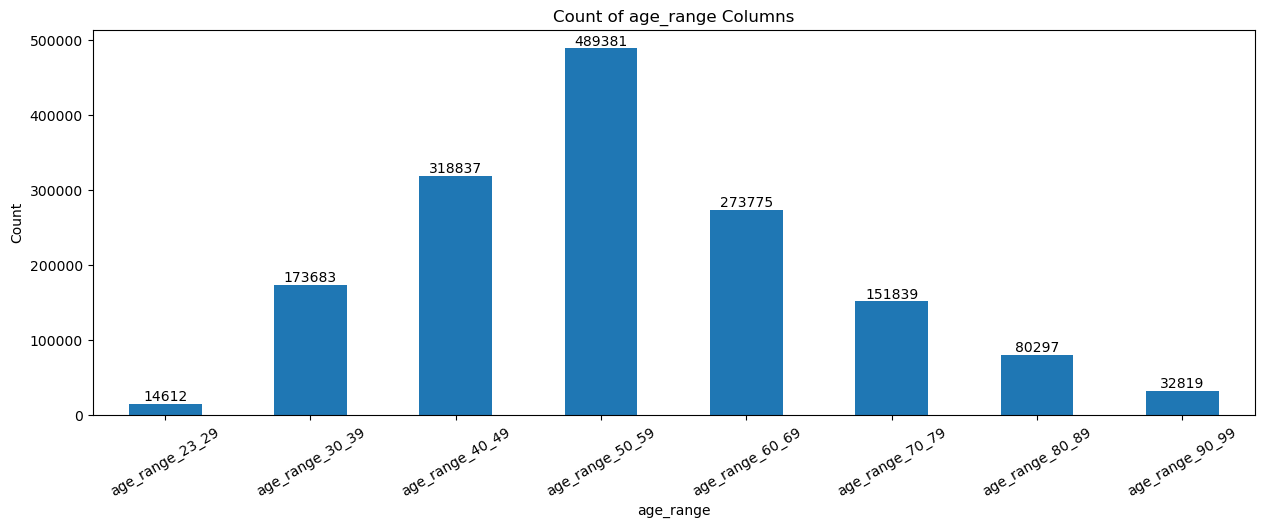

In [217]:
# Filter age range columns
age_range_columns = [col for col in df_auto_churn_clean.columns if col.startswith('age_range_')]

# Calculate the counts for each age range column
age_range_counts = df_auto_churn_clean[age_range_columns].sum()

# Plot vertical bar chart for age_range columns
plt.figure(figsize=(15, 5))
age_range_counts.plot(kind='bar')
plt.xlabel('age_range')
plt.ylabel('Count')
plt.title('Count of age_range Columns')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Annotate bars in the age_range chart
for i, count in enumerate(age_range_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom')

plt.show()

Now that we have consolidated the age columns into ranges, we can still see a normal distribution with a slight right skew. Additionally, it is no surprise that the 50-59 range is still the peak, which is the same behavior we saw in the original age columns. 

Now that we have completed the consolidation of 'age_in_year' into to "age_range_' columns, we can move on to a final sense check and heatmap(s) of the DataFrame before establishing our baseline models. 

## 7. Final Sense Check & Heatmaps

We will start with checking the info of the DataFrame to ensure all dtypes are numerical and all of the desired columns are present. 

In [222]:
# Display information about df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539026 entries, 0 to 1680908
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1539026 non-null  float32
 1   days_tenure             1539026 non-null  float32
 2   income                  1539026 non-null  float32
 3   has_children            1539026 non-null  int32  
 4   length_of_residence     1539026 non-null  float32
 5   home_owner              1539026 non-null  int32  
 6   college_degree          1539026 non-null  int32  
 7   good_credit             1539026 non-null  int32  
 8   Churn                   1539026 non-null  int32  
 9   avg_home_market_value   1539026 non-null  float64
 10  county_Collin           1539026 non-null  bool   
 11  county_Cooke            1539026 non-null  bool   
 12  county_Dallas           1539026 non-null  bool   
 13  county_Denton           1539026 non-null  bool   
 14  county_

Everything is as desire except a few dtypes need to be converted. 

Let's complete the following conversions below and sense check them by reviewing the DataFrame info. 

bool to int32
int64 to int32
float64 to float32

In [224]:
# Identify all columns with bool dtype
bool_columns = df_auto_churn_clean.select_dtypes(include='bool').columns

# Convert these columns to int64
df_auto_churn_clean[bool_columns] = df_auto_churn_clean[bool_columns].astype('int32')

In [225]:
# Identify all columns with float64 dtype
int64_columns = df_auto_churn_clean.select_dtypes(include='int64').columns

# Convert these columns to float32
df_auto_churn_clean[int64_columns] = df_auto_churn_clean[int64_columns].astype('int32')

In [226]:
# Identify all columns with float64 dtype
float64_columns = df_auto_churn_clean.select_dtypes(include='float64').columns

# Convert these columns to float32
df_auto_churn_clean[float64_columns] = df_auto_churn_clean[float64_columns].astype('float32')

In [227]:
# Display information about df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539026 entries, 0 to 1680908
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1539026 non-null  float32
 1   days_tenure             1539026 non-null  float32
 2   income                  1539026 non-null  float32
 3   has_children            1539026 non-null  int32  
 4   length_of_residence     1539026 non-null  float32
 5   home_owner              1539026 non-null  int32  
 6   college_degree          1539026 non-null  int32  
 7   good_credit             1539026 non-null  int32  
 8   Churn                   1539026 non-null  int32  
 9   avg_home_market_value   1539026 non-null  float32
 10  county_Collin           1539026 non-null  int32  
 11  county_Cooke            1539026 non-null  int32  
 12  county_Dallas           1539026 non-null  int32  
 13  county_Denton           1539026 non-null  int32  
 14  county_

The dtype conversions were successful.

Now we will confirm that there are no missing or null values. 

In [230]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt              0.0
days_tenure               0.0
income                    0.0
has_children              0.0
length_of_residence       0.0
home_owner                0.0
college_degree            0.0
good_credit               0.0
Churn                     0.0
avg_home_market_value     0.0
county_Collin             0.0
county_Cooke              0.0
county_Dallas             0.0
county_Denton             0.0
county_Ellis              0.0
county_Grayson            0.0
county_Hunt               0.0
county_Johnson            0.0
county_Kaufman            0.0
county_Navarro            0.0
county_Parker             0.0
county_Rockwall           0.0
marital_status_Married    0.0
age_range_23_29           0.0
age_range_30_39           0.0
age_range_40_49           0.0
age_range_50_59           0.0
age_range_60_69           0.0
age_range_70_79           0.0
age_range_80_89           0.0
age_range_90_99           0.0
dtype: float64

There are no missing or null values. 

Now let's make a heatmap. 

In [233]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,avg_home_market_value,...,county_Rockwall,marital_status_Married,age_range_23_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60_69,age_range_70_79,age_range_80_89,age_range_90_99
0,818.877991,1454.0,22500.0,1,15.0,1,1,1,0,62499.5,...,0,1,0,0,1,0,0,0,0,0
1,974.199158,1795.0,27500.0,0,2.0,1,0,0,0,62499.5,...,0,0,0,0,0,0,0,1,0,0
2,967.375122,4818.0,42500.0,0,10.0,1,0,0,0,87499.5,...,0,1,0,0,0,1,0,0,0,0
3,992.409546,130.0,125000.0,1,6.0,1,0,1,1,187499.5,...,0,1,0,0,0,1,0,0,0,0
4,784.633484,5896.0,87500.0,1,4.0,1,1,1,0,237499.5,...,0,1,0,0,0,1,0,0,0,0


### Heatmap 3

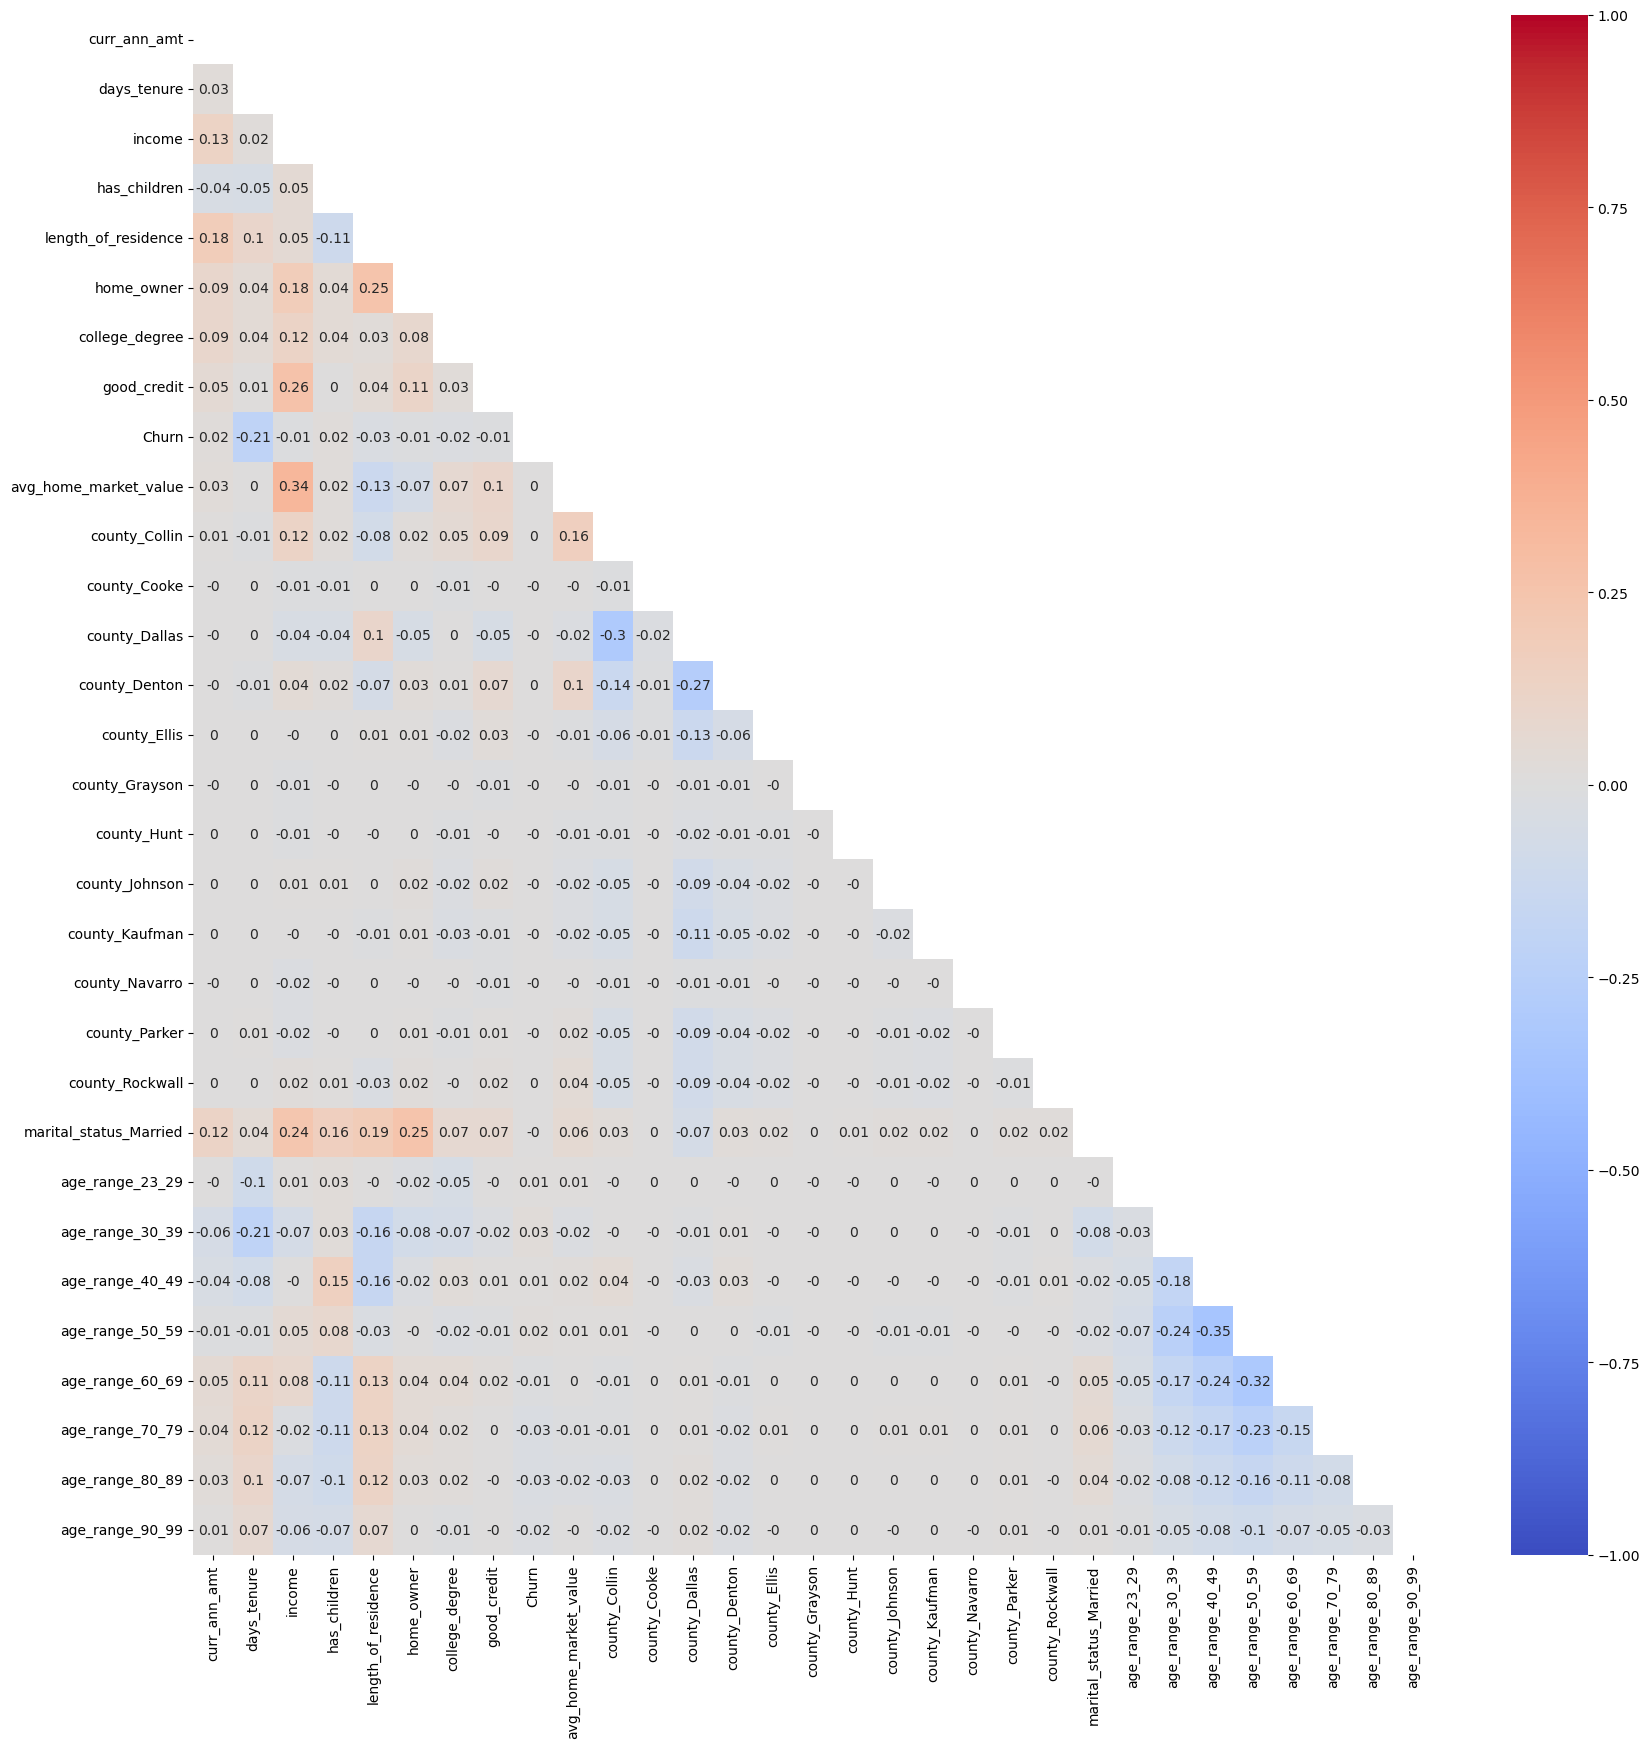

In [235]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

All the collinearity relationships appear to be reasonable and none are at or above the 0.5/-0.5 thresholds. 

However, based on the heatmap collinearity the relationships between the 'Churn' column and the rest of the columns are either 0 or near zero, retaining it in the DataFrame will hold no value for modeling. Therefore, I will drop the 'Churn' column and make the target of this project days_tenure. This makes sense as solving the issue of Churn can be found by exploring what factors indicate the likelihood of customer retention. 

In [237]:
# Dropping 'Churn' columns from df_auto_churn_clean
df_auto_days_tenure_clean = df_auto_churn_clean.drop(['Churn'], axis=1)

Let's complete a sense check to confirm the 'Churn' column was dropped.

In [239]:
# Display information about df_auto_churn_clean
df_auto_days_tenure_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539026 entries, 0 to 1680908
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1539026 non-null  float32
 1   days_tenure             1539026 non-null  float32
 2   income                  1539026 non-null  float32
 3   has_children            1539026 non-null  int32  
 4   length_of_residence     1539026 non-null  float32
 5   home_owner              1539026 non-null  int32  
 6   college_degree          1539026 non-null  int32  
 7   good_credit             1539026 non-null  int32  
 8   avg_home_market_value   1539026 non-null  float32
 9   county_Collin           1539026 non-null  int32  
 10  county_Cooke            1539026 non-null  int32  
 11  county_Dallas           1539026 non-null  int32  
 12  county_Denton           1539026 non-null  int32  
 13  county_Ellis            1539026 non-null  int32  
 14  county_

The 'Churn' column was dropped. 

Let's create a new Heatmap to see if there were any changes. 

### Heatmap 4

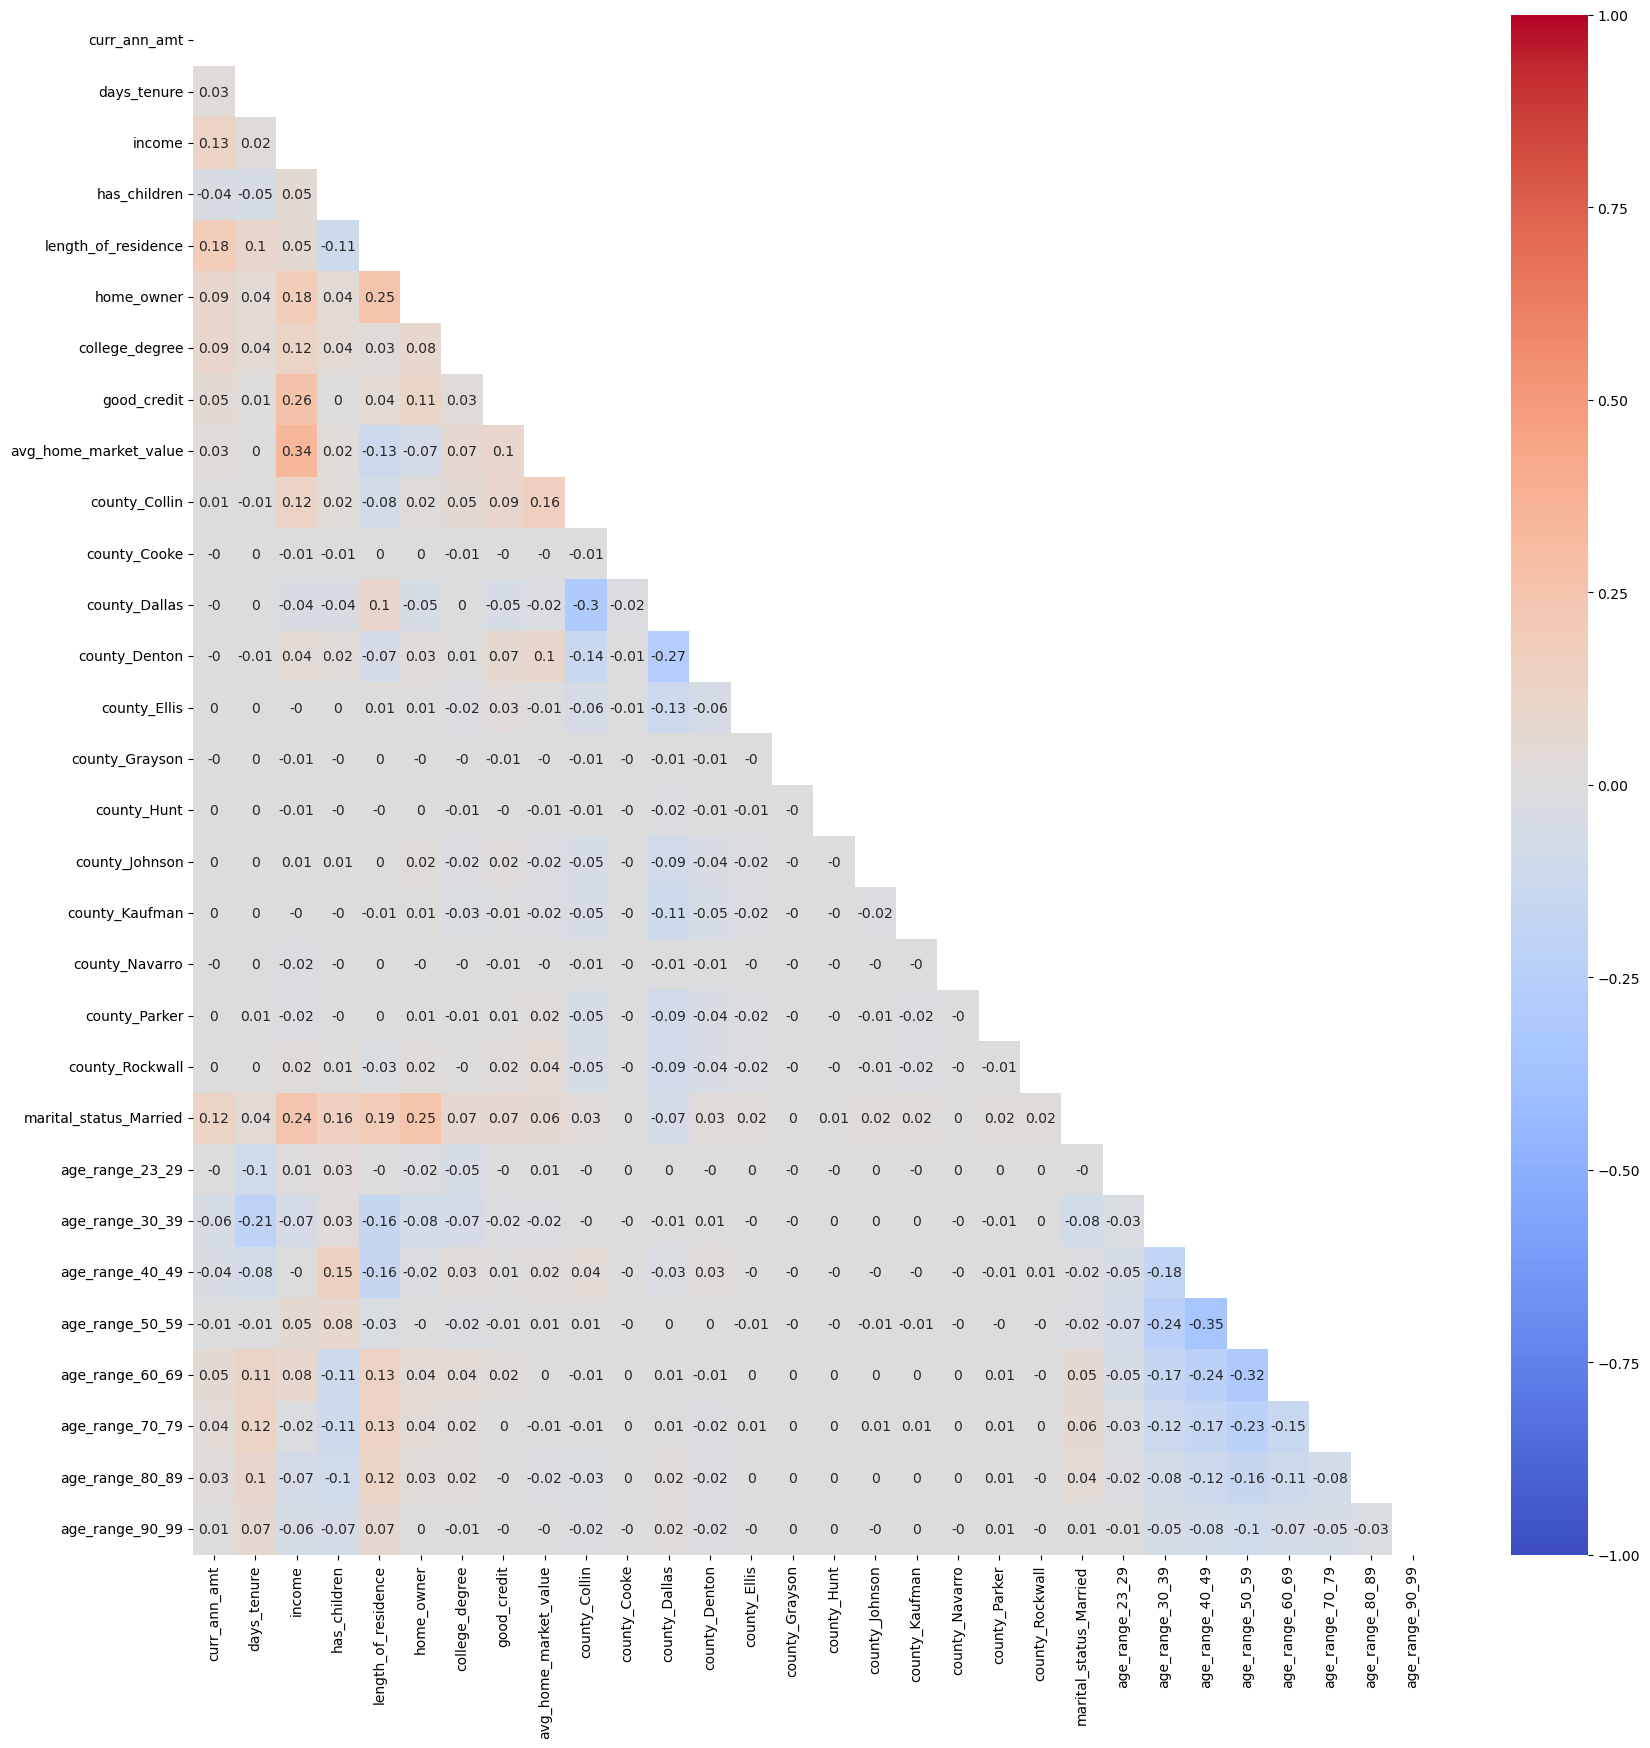

In [243]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_days_tenure_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_days_tenure_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

Based on all the prior heatmaps, it is apparent that many of the columns in this DataFrame do not have strong relationships. For the next iteration of this project there will be consideration about dropping the county columns as most of them show little to no relationship with any other columns. 

Let's save this clean, processed DataFrame into a CSV file for retention. 

In [246]:
# Save the cleaned DataFrame df_auto_days_tenure_clean to a CSV file named 'df_auto_days_tenure_clean.csv' in the 'Data' directory
df_auto_days_tenure_clean.to_csv('Data/df_auto_days_tenure_clean.csv')

## 8. Baseline Modeling
<a class="anchor" id="part-7"></a>

Let's start the modeling by loading the new CSV file we created. We are loading a new CSV with the hopes it will help the model run.

In [249]:
# Read the CSV file 'auto_insurance_churn.csv' into the DataFrame df_raw
df_auto_days_tenure_clean = pd.read_csv('Data/df_auto_days_tenure_clean.csv')

Now that the DataFrame has been cleaned and processed we can conduct some baseline modeling. 

We will start by first completing a test/train split on the DataFrame where we will establish our independent variables as X and dependent variables as y. 

### - Test/Train Split

We will do sense check on the DataFrame to see if the memory usage is manageable  for the hardware we are using. 

In [254]:
# Display information about df_auto_churn_clean
df_auto_days_tenure_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539026 entries, 0 to 1539025
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1539026 non-null  int64  
 1   curr_ann_amt            1539026 non-null  float64
 2   days_tenure             1539026 non-null  float64
 3   income                  1539026 non-null  float64
 4   has_children            1539026 non-null  int64  
 5   length_of_residence     1539026 non-null  float64
 6   home_owner              1539026 non-null  int64  
 7   college_degree          1539026 non-null  int64  
 8   good_credit             1539026 non-null  int64  
 9   avg_home_market_value   1539026 non-null  float64
 10  county_Collin           1539026 non-null  int64  
 11  county_Cooke            1539026 non-null  int64  
 12  county_Dallas           1539026 non-null  int64  
 13  county_Denton           1539026 non-null  int64  
 14  co

The memory usage is at 372.8 M, which is too high for my machine to handle. In order to establish my baseline models I will have to convert all dtypes that use 64 bit memory to 32 bit. Also, I will have to use a fraction of my DataFrame so my machine can run the model. I tested several fractions and found that 3.5% was the ideal number that was not too time-consuming and did not crash my machine. 

Below I will convert the dtypes and do a sense check. 

In [257]:
# Identify all columns with float64 dtype
int64_columns = df_auto_days_tenure_clean.select_dtypes(include='int64').columns

# Convert these columns to float32
df_auto_days_tenure_clean[int64_columns] = df_auto_days_tenure_clean[int64_columns].astype('int32')

In [258]:
# Identify all columns with float64 dtype
float64_columns = df_auto_days_tenure_clean.select_dtypes(include='float64').columns

# Convert these columns to float32
df_auto_days_tenure_clean[float64_columns] = df_auto_days_tenure_clean[float64_columns].astype('float32')

In [259]:
# Display information about df_auto_churn_clean
df_auto_days_tenure_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539026 entries, 0 to 1539025
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1539026 non-null  int32  
 1   curr_ann_amt            1539026 non-null  float32
 2   days_tenure             1539026 non-null  float32
 3   income                  1539026 non-null  float32
 4   has_children            1539026 non-null  int32  
 5   length_of_residence     1539026 non-null  float32
 6   home_owner              1539026 non-null  int32  
 7   college_degree          1539026 non-null  int32  
 8   good_credit             1539026 non-null  int32  
 9   avg_home_market_value   1539026 non-null  float32
 10  county_Collin           1539026 non-null  int32  
 11  county_Cooke            1539026 non-null  int32  
 12  county_Dallas           1539026 non-null  int32  
 13  county_Denton           1539026 non-null  int32  
 14  co

Memory useage was reduced to 186.4 MB after a successful conversion. 

In [261]:
# Take a random sample of 3.5% of the rows from df_auto_days_tenure_clean and assign it to df_auto_days_tenure_frac
df_auto_days_tenure_frac = df_auto_days_tenure_clean.sample(frac=0.035)

Let's check the shape and info of the sampled DataFrame. 

In [263]:
# Print the shape of the df_auto_days_tenure_frac DataFrame
df_auto_days_tenure_frac.shape

(53866, 31)

The DataFrame as a reasonable shape that my machine can handle. 

In [265]:
# Display the first few rows of the DataFrame to preview the data
df_auto_days_tenure_frac.head()

,Unnamed: 0,curr_ann_amt,days_tenure,income,has_children,length_of_residence,home_owner,college_degree,good_credit,avg_home_market_value,...,county_Rockwall,marital_status_Married,age_range_23_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60_69,age_range_70_79,age_range_80_89,age_range_90_99
208127,227510,1212.152954,1316.0,125000.0,0,12.0,1,0,1,162499.5,...,0,1,0,0,0,1,0,0,0,0
961786,1050330,454.926910,226.0,70000.0,1,8.0,1,1,1,112499.5,...,0,0,0,0,0,0,0,0,1,0
956,1030,1034.935913,4348.0,62500.0,0,15.0,1,1,1,137499.5,...,0,1,0,0,0,0,0,1,0,0
29474,32198,1553.518311,1285.0,70000.0,1,10.0,1,1,1,112499.5,...,0,1,0,0,1,0,0,0,0,0
960300,1048670,1361.522583,364.0,87500.0,1,15.0,1,0,1,137499.5,...,0,1,0,0,0,0,1,0,0,0


In [266]:
# Display information about df_auto_churn_clean
df_auto_days_tenure_frac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53866 entries, 208127 to 1502123
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53866 non-null  int32  
 1   curr_ann_amt            53866 non-null  float32
 2   days_tenure             53866 non-null  float32
 3   income                  53866 non-null  float32
 4   has_children            53866 non-null  int32  
 5   length_of_residence     53866 non-null  float32
 6   home_owner              53866 non-null  int32  
 7   college_degree          53866 non-null  int32  
 8   good_credit             53866 non-null  int32  
 9   avg_home_market_value   53866 non-null  float32
 10  county_Collin           53866 non-null  int32  
 11  county_Cooke            53866 non-null  int32  
 12  county_Dallas           53866 non-null  int32  
 13  county_Denton           53866 non-null  int32  
 14  county_Ellis            53866 non-nu

The memory use is now 6.8 MB vs the 186.4 MB we had prior to sampling. 

Let's conduct the Test/Train split and scale the data while we are doing it. We are scaling the data as not all the values in the DataFrame are in the same ranges, so scaling will help to put all the data on the same scale over measurement. This can help with model accuracy. 

In [269]:
# Extract features (X) and target (y) from df_auto_days_tenure_clean
X = df_auto_days_tenure_frac.drop(['days_tenure'], axis=1)
y = df_auto_days_tenure_frac['days_tenure']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Let's print the shape and summary statistics to confirm the split was done correctly and the scaling took. 

In [271]:
print(f'X_train shape: {X_train_scaled.shape}')
print(f'X_test shape: {X_test_scaled.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (37706, 30)
X_test shape: (16160, 30)
y_train shape: (37706,)
y_test shape: (16160,)


In [272]:
# Create DataFrame for scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print(X_train_scaled_df.describe())

         Unnamed: 0  curr_ann_amt        income  has_children  \
count  3.770600e+04  3.770600e+04  3.770600e+04  3.770600e+04   
mean   4.334186e-17 -2.050259e-16 -4.522629e-18  1.714830e-17   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -1.732659e+00 -3.920170e+00 -1.407419e+00 -1.062073e+00   
25%   -8.680811e-01 -6.810241e-01 -6.359213e-01 -1.062073e+00   
50%   -3.768329e-03 -2.387356e-02 -2.274814e-01  9.415552e-01   
75%    8.770310e-01  6.618998e-01  9.019398e-02  9.415552e-01   
max    1.724329e+00  4.415143e+00  3.040037e+00  9.415552e-01   

       length_of_residence    home_owner  college_degree   good_credit  \
count         3.770600e+04  3.770600e+04    3.770600e+04  3.770600e+04   
mean         -4.447252e-17 -9.082947e-17   -6.897010e-17  1.375633e-16   
std           1.000013e+00  1.000013e+00    1.000013e+00  1.000013e+00   
min          -1.582119e+00 -2.764098e+00   -7.555273e-01 -2.435154e+00   
25%          -9.844317e-01  3.617817e-01   -

The DataFrame appears to be scaled and the shape makes sense for the type of sampling we did. 

Now that the DataFrame has been split and scaled we can move on to some baseline modeling. 

### - Logistic Models

Please note that even with only using 3.5% of the DataFrame, running this logistic regression took about 5 minutes (future models will likely take just as long if not longer). The length of time it took to run in Colab was significantly longer. Therefore, it is ideal to continue to run this project via JupyterLab.


Additionally, based on the prior EDA and heatmaps, the scores for this model may not be high. Moreover, ther is a possibility for overfitting as we are working with a small sample of the DataFrame as well as the disproportionate number of 'age_range_50_59' counts.

#### - Logistic Model 1

In [278]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression()

# Fitting to original data
my_logreg.fit(X_train_scaled,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train_scaled, y_train)}')
print(f'Test Score: {my_logreg.score(X_test_scaled, y_test)}')

Train Score: 0.3087307059884368
Test Score: 0.30086633663366336


As expected, the scores are low. Additionally, after running the models several times, there are instances where the test score is higher than the train score, which is indicative of overfitting. This inconsistent performance could be the result of random sampling of the DataFrame. 

Since we are having difficulty with modeling and the accuracy is low. Let's consider dropping  all the county columns as they did not appear to have any strong relationships with the other columns in the DataFrame. Then we will rerun the logistic model. 

#### - Logistic Model 2

In [282]:
# Identify columns that start with 'county_' in the DataFrame
county_columns = [col for col in df_auto_days_tenure_frac.columns if col.startswith('county_')]

# Drop the identified 'county_' columns from the DataFrame
df_auto_days_tenure_frac.drop(columns=county_columns, inplace=True)

In [283]:
# Display information about df_auto_days_tenure_frac
df_auto_days_tenure_frac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53866 entries, 208127 to 1502123
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53866 non-null  int32  
 1   curr_ann_amt            53866 non-null  float32
 2   days_tenure             53866 non-null  float32
 3   income                  53866 non-null  float32
 4   has_children            53866 non-null  int32  
 5   length_of_residence     53866 non-null  float32
 6   home_owner              53866 non-null  int32  
 7   college_degree          53866 non-null  int32  
 8   good_credit             53866 non-null  int32  
 9   avg_home_market_value   53866 non-null  float32
 10  marital_status_Married  53866 non-null  int32  
 11  age_range_23_29         53866 non-null  int32  
 12  age_range_30_39         53866 non-null  int32  
 13  age_range_40_49         53866 non-null  int32  
 14  age_range_50_59         53866 non-nu

The county columns were dropped. 

Let's resamlple the DataFrame and redo the Test/Train split. We will sense check via shape and/or head and/or info reviews.

In [286]:
# Print the shape of the df_auto_days_tenure_frac DataFrame
df_auto_days_tenure_frac.shape

(53866, 19)

In [287]:
# Display the first few rows of the DataFrame to preview the data
df_auto_days_tenure_frac.head()

,Unnamed: 0,curr_ann_amt,days_tenure,income,has_children,length_of_residence,home_owner,college_degree,good_credit,avg_home_market_value,marital_status_Married,age_range_23_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60_69,age_range_70_79,age_range_80_89,age_range_90_99
208127,227510,1212.152954,1316.0,125000.0,0,12.0,1,0,1,162499.5,1,0,0,0,1,0,0,0,0
961786,1050330,454.926910,226.0,70000.0,1,8.0,1,1,1,112499.5,0,0,0,0,0,0,0,1,0
956,1030,1034.935913,4348.0,62500.0,0,15.0,1,1,1,137499.5,1,0,0,0,0,0,1,0,0
29474,32198,1553.518311,1285.0,70000.0,1,10.0,1,1,1,112499.5,1,0,0,1,0,0,0,0,0
960300,1048670,1361.522583,364.0,87500.0,1,15.0,1,0,1,137499.5,1,0,0,0,0,1,0,0,0


Everything checks out. 

In [289]:
# Extract features (X) and target (y) from df_auto_days_tenure_clean
X = df_auto_days_tenure_frac.drop(['days_tenure'], axis=1)
y = df_auto_days_tenure_frac['days_tenure']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [290]:
print(f'X_train shape: {X_train_scaled.shape}')
print(f'X_test shape: {X_test_scaled.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (37706, 18)
X_test shape: (16160, 18)
y_train shape: (37706,)
y_test shape: (16160,)


In [291]:
# Create DataFrame for scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print(X_train_scaled_df.describe())

         Unnamed: 0  curr_ann_amt        income  has_children  \
count  3.770600e+04  3.770600e+04  3.770600e+04  3.770600e+04   
mean   4.334186e-17 -2.050259e-16 -4.522629e-18  1.714830e-17   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -1.732659e+00 -3.920170e+00 -1.407419e+00 -1.062073e+00   
25%   -8.680811e-01 -6.810241e-01 -6.359213e-01 -1.062073e+00   
50%   -3.768329e-03 -2.387356e-02 -2.274814e-01  9.415552e-01   
75%    8.770310e-01  6.618998e-01  9.019398e-02  9.415552e-01   
max    1.724329e+00  4.415143e+00  3.040037e+00  9.415552e-01   

       length_of_residence    home_owner  college_degree   good_credit  \
count         3.770600e+04  3.770600e+04    3.770600e+04  3.770600e+04   
mean         -4.447252e-17 -9.082947e-17   -6.897010e-17  1.375633e-16   
std           1.000013e+00  1.000013e+00    1.000013e+00  1.000013e+00   
min          -1.582119e+00 -2.764098e+00   -7.555273e-01 -2.435154e+00   
25%          -9.844317e-01  3.617817e-01   -

The Test/Train split and scaling are as desired. 

In [293]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression()

# Fitting to original data
my_logreg.fit(X_train_scaled,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train_scaled, y_train)}')
print(f'Test Score: {my_logreg.score(X_test_scaled, y_test)}')

Train Score: 0.30395692993157586
Test Score: 0.30129950495049507


There was no change in the runtime and the accuracy scores had a marginal drop. 

Let's try a different type of model. We will continue to use the DataFrame without the county columns as the run time is expected to be longer than that of the logistic model. 

### - XG Boost Model

In [297]:
# Initialize the XGBoost regressor with max_depth of 6
xgb_model = xgb.XGBRegressor(max_depth=6, n_estimators=100, random_state=42)

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 5111814.5000
R^2 Score: 0.0646


Based on the Mean Squared Error, the XG Boost model is not very good at making predictions on this DataFrame. 

The R^2 score supports our findings above as the model is only able to explain about 7.05% of the variance in the target variable. In other words, the model does not fit this data. 

Let's try another model.

### - Decision Tree Model

In [301]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the scaled training data
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores and the mean score
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.1170777  0.12027583 0.11788887 0.11709322 0.11616496]
Mean cross-validation score: 0.1177001172868791


The Mean cross-validation score is considerably low. This is likely due to the data quality. However, hyperparameter tuning could be helpful. 

### * Model Challenges & Attempted Solutions

Due to the size of the DataFrame, there were computational limits that did not allow for the above logisitic model to run. Therefore, we will have to use an alternate method complete a logisitc regression. Since the majority of the Dataframe row values have 0 we wil use the Spare Data Representation approach for our models going forward.

UPDATE: The Sparse Matrix method did not work to resolve the computational limits of my hardware. Thus, I went back and attempted the following items.

    - Using a fraction of my DataFrame (However, doing this may impact the accuracy of my model)
    - Scaling my data


OpenAI. 2024. ChatGPT (GPT-4.0). [Generative AI]. [Accessed 21 July 2024]. Available from: https://chatgpt.com/share/9b0d5d85-7c81-4562-b8f2-2724ff309288

Used to help resolve issue with the running models on large DataFrame. 

#### - Sparse Matrix Test/Train Split

In [ ]:
'''from scipy.sparse import csr_matrix

# Extract features (X) and target (y) from df_auto_days_tenure_clean
X = df_auto_days_tenure_clean.drop(['days_tenure'], axis=1)
y = df_auto_days_tenure_clean['days_tenure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Convert the training data to a sparse matrix format
X_train_sparse = csr_matrix(X_train)

In [ ]:
''''# Train the logistic regression model using the sparse data
model = LogisticRegression()
model.fit(X_train_sparse, y_train)

# Convert the test data to a sparse matrix and make predictions
X_test_sparse = csr_matrix(X_test)
y_pred = model.predict(X_test_sparse)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)